In [3]:
#------>change the sample name and round as relevant
sample = 'ISS17' 
round = 'R3'

In [4]:
#1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import os
import glob
import shutil
import fnmatch

In [6]:
#makes new 'text' and 'out' folders
path1 = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/'+round+'_data/'+sample+'/text/')
path2 = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/'+round+'_data/'+sample+'/out/')
#os.mkdir(path1)
#os.mkdir(path2)

#there is an initial and other dirIn because the location of the text file changes after the os.walk function
initial_dirIn = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/'+round+'_data/'+sample)
dirIn = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/'+round+'_data/'+sample+'/text/')
dirOut = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/'+round+'_data/'+sample+'/out/')

#move files
walker1 = os.walk(initial_dirIn)

for data in walker1:
    for files in data[2]:
        try:
            shutil.move(data[0] + os.sep + files, dirIn)
        except shutil.Error:
            continue

            
#2. Convert files to .csv, add row (Wavelength) and column labels (measurement 1-5)
header = (list(np.arange(1,6)))
wavelengths = list(np.arange(350,2501))

text_files = [f for f in os.listdir(dirIn) if f.endswith('.txt')]

def to_csv_file(file):
    global df
    os.chdir(dirIn)
    df = pd.read_csv(file, names = header, header=None, sep=',')
    df = df.add_prefix('measurement')
    df.insert(0,'Wavelength',wavelengths)
    df = df.set_index('Wavelength')
    print(df)

In [7]:
#need to delete .csv files from previous runs of code
def remove_csv(path):
    files_in_dir = os.listdir(path)
    filtered_files = [file for file in files_in_dir if file.endswith('.csv')]
    print(filtered_files)
    for file in filtered_files:
        path_to_file = os.path.join(path, file)
        os.remove(path_to_file)


In [8]:
#change the ISS.. number of file name to swap between samples
path = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/'+round+'_data/'+sample+'/text/')
remove_csv(path)

['05.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '15.csv', '16.csv', '17.csv', '18.csv', '19.csv', '20.csv', '21.csv', '22.csv', '23.csv', '24.csv', '25.csv', '30.csv', '35.csv', '40.csv', '45.csv', 'dry.csv']


In [9]:
#call function which makes new csv files
for entry in text_files:
    file = entry
    print(to_csv_file(file))
    df.to_csv(file +'.csv')
    
#fix file names
for filename in os.listdir(dirIn):
    if filename.endswith('.txt.csv'):
        os.rename(filename,filename[:-8]+'.csv')

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.119244      0.112848      0.109060      0.098965   
351             0.109879      0.107089      0.103745      0.102401   
352             0.096160      0.092501      0.088192      0.090418   
353             0.087591      0.081331      0.081488      0.080014   
354             0.089007      0.080812      0.083469      0.077664   
355             0.099521      0.092411      0.086173      0.084284   
356             0.091530      0.088797      0.085016      0.086327   
357             0.079249      0.081630      0.081585      0.079683   
358             0.076720      0.081566      0.078321      0.067855   
359             0.079366      0.078782      0.076197      0.071720   
360             0.085672      0.080354      0.078195      0.076861   
361             0.089798      0.085008      0.080952      0.077639   
362             0.07

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.099864      0.091394      0.088690      0.095937   
351             0.102766      0.099809      0.095093      0.092675   
352             0.090117      0.089115      0.086419      0.079365   
353             0.079456      0.076952      0.073721      0.068664   
354             0.077944      0.072650      0.070738      0.070016   
355             0.085818      0.079960      0.086736      0.086603   
356             0.076493      0.075166      0.074080      0.076832   
357             0.069803      0.070298      0.063171      0.064541   
358             0.078260      0.073569      0.074962      0.068876   
359             0.075947      0.067013      0.075168      0.072226   
360             0.077198      0.068465      0.073574      0.074330   
361             0.081591      0.076801      0.073410      0.074145   
362             0.06

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.078108      0.087954      0.092503      0.100456   
351             0.092859      0.099665      0.097628      0.100886   
352             0.081222      0.090710      0.087581      0.081837   
353             0.076646      0.079498      0.073416      0.069585   
354             0.080090      0.073920      0.066631      0.068805   
355             0.081472      0.076783      0.075299      0.074218   
356             0.072794      0.073289      0.077360      0.068814   
357             0.065381      0.070202      0.075241      0.064203   
358             0.067665      0.072594      0.072920      0.068935   
359             0.070532      0.070717      0.066293      0.069568   
360             0.073028      0.068486      0.070813      0.070364   
361             0.073214      0.067201      0.080866      0.069894   
362             0.06

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.079403      0.088570      0.088980      0.098038   
351             0.085458      0.102739      0.099981      0.105004   
352             0.085834      0.083532      0.076574      0.088513   
353             0.074524      0.070413      0.062809      0.068620   
354             0.067518      0.070790      0.066991      0.061001   
355             0.083697      0.078979      0.081557      0.075089   
356             0.079222      0.074444      0.071699      0.071459   
357             0.069823      0.066193      0.058987      0.065834   
358             0.069815      0.063854      0.060536      0.070650   
359             0.064234      0.066815      0.055704      0.065257   
360             0.064155      0.069828      0.060313      0.062932   
361             0.068845      0.069207      0.071727      0.065851   
362             0.06

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.073532      0.083216      0.101304      0.095416   
351             0.090223      0.092247      0.086051      0.101817   
352             0.078447      0.073831      0.082992      0.080674   
353             0.071022      0.066544      0.075318      0.066857   
354             0.071901      0.072119      0.069969      0.066908   
355             0.074349      0.078076      0.077742      0.074698   
356             0.068387      0.066088      0.069364      0.069846   
357             0.061555      0.060900      0.059479      0.062056   
358             0.061068      0.075578      0.061740      0.061538   
359             0.068138      0.070731      0.071791      0.068914   
360             0.067120      0.066993      0.073468      0.072058   
361             0.057154      0.068011      0.065249      0.067389   
362             0.05

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.091299      0.115638      0.108099      0.100152   
351             0.088897      0.113285      0.109209      0.098934   
352             0.079915      0.096575      0.086517      0.087670   
353             0.066391      0.084925      0.074844      0.080847   
354             0.060908      0.082188      0.075278      0.083403   
355             0.074857      0.084818      0.076184      0.093999   
356             0.073503      0.081534      0.074411      0.089229   
357             0.067318      0.080013      0.071792      0.079235   
358             0.067886      0.084507      0.071450      0.075223   
359             0.070683      0.080270      0.079078      0.076664   
360             0.074140      0.078213      0.080034      0.079799   
361             0.075347      0.079726      0.072539      0.080282   
362             0.06

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.095613      0.104585      0.106554      0.086485   
351             0.100595      0.104526      0.097924      0.089680   
352             0.087348      0.093869      0.091138      0.080231   
353             0.073235      0.080189      0.089543      0.071478   
354             0.071090      0.073674      0.091473      0.070137   
355             0.087203      0.081787      0.092331      0.078516   
356             0.082144      0.080537      0.085518      0.079297   
357             0.068021      0.075747      0.080611      0.076147   
358             0.060842      0.074583      0.082731      0.074649   
359             0.066689      0.075866      0.075709      0.077510   
360             0.074488      0.075087      0.077084      0.078573   
361             0.077249      0.071258      0.085314      0.075319   
362             0.07

[2151 rows x 5 columns]
None
            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.092328      0.087822      0.095624      0.077290   
351             0.111313      0.088883      0.120339      0.088520   
352             0.081299      0.080971      0.107478      0.094730   
353             0.073483      0.073023      0.091518      0.088717   
354             0.086927      0.071876      0.083527      0.082505   
355             0.094601      0.080796      0.084210      0.091380   
356             0.084279      0.076613      0.073675      0.078664   
357             0.073867      0.069024      0.067677      0.068172   
358             0.076436      0.067590      0.077199      0.076893   
359             0.081284      0.068233      0.089014      0.081208   
360             0.081344      0.075879      0.090294      0.080693   
361             0.076150      0.083878      0.081685      0.0

[2151 rows x 5 columns]
None
            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.080512      0.069470      0.079963      0.068449   
351             0.094100      0.074966      0.087246      0.098820   
352             0.072647      0.068380      0.062438      0.067337   
353             0.059965      0.063255      0.049308      0.045547   
354             0.061587      0.062853      0.052272      0.043440   
355             0.068532      0.065738      0.060823      0.050076   
356             0.061930      0.054223      0.063049      0.055175   
357             0.059047      0.049289      0.057353      0.055202   
358             0.068166      0.061187      0.047683      0.050758   
359             0.052442      0.051791      0.049440      0.050544   
360             0.050729      0.042820      0.050561      0.051160   
361             0.065307      0.041882      0.046447      0.0

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.058380      0.071385      0.059120      0.078419   
351             0.075119      0.071050      0.070637      0.081100   
352             0.055258      0.046231      0.068753      0.072368   
353             0.036140      0.038659      0.055647      0.058311   
354             0.032560      0.046875      0.049140      0.052358   
355             0.047731      0.052982      0.066924      0.066069   
356             0.046801      0.051747      0.056383      0.060566   
357             0.036810      0.047580      0.041115      0.049413   
358             0.030579      0.045640      0.042434      0.047159   
359             0.040565      0.049121      0.042078      0.048547   
360             0.048962      0.049266      0.046299      0.051918   
361             0.047884      0.044969      0.051136      0.053289   
362             0.03

In [10]:
#3. Use a 'for' loop to read csv's and compile into a df
path = dirIn
all_files = glob.glob('*.csv')
all_df = []

#make a df
for f in all_files:
    df = pd.read_csv(f, sep=',')
    df['MC'] = f.split('.')[-2]
    all_df.append(df)
merged_df = pd.concat(all_df, ignore_index=True, sort=True)
merged_df.head(2)

MC  Wavelength  measurement1  measurement2  measurement3  measurement4  \
0  05         350      0.119244      0.112848      0.109060      0.098965   
1  05         351      0.109879      0.107089      0.103745      0.102401   

   measurement5  
0      0.098965  
1      0.102401

In [11]:
column = merged_df.loc[: , 'measurement1':'measurement5']
merged_df['mean_reflectance'] = column.mean(axis=1)
merged_df['max_reflectance'] = column.max(axis=1)
merged_df['min_reflectance'] = column.min(axis=1)

In [12]:
#replace txt with dry wherever it occurs in df
merged_df = merged_df.replace('ISS10','dry')
merged_df = merged_df.replace('airdry','dry')
merged_df = merged_df.replace('txt','dry')
merged_df = merged_df.replace('5','05')
merged_df.MC.unique()

array(['05', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '30', '35', '40', '45', 'dry'],
      dtype=object)

In [13]:
#puts 5 at the top. Dry is still down the bottom
merged_df.sort_values(by=['MC','Wavelength'],inplace=True)
merged_df.MC.unique()

array(['05', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '30', '35', '40', '45', 'dry'],
      dtype=object)

In [14]:
#reduce the df to wavelength and mean reflectance columns
mean_df = merged_df[['Wavelength','MC','mean_reflectance']]

#reduce the df to wavelength and max/min reflectance columns respectively
max_df = merged_df[['Wavelength','MC','max_reflectance']]
min_df = merged_df[['Wavelength','MC','min_reflectance']]

#6. Re-arrange the df with a pivot table so that row labels = Wavelength, column labels = sample name
mean_pivot = pd.pivot_table(mean_df, index=['Wavelength'],values=['mean_reflectance'],columns=['MC'])
max_pivot = pd.pivot_table(max_df, index=['Wavelength'],values=['max_reflectance'],columns=['MC'])
min_pivot = pd.pivot_table(min_df, index=['Wavelength'],values=['min_reflectance'],columns=['MC'])

mean_pivot.columns = mean_pivot.columns.droplevel(0)
min_pivot.columns = min_pivot.columns.droplevel(0)
max_pivot.columns = max_pivot.columns.droplevel(0)
mean_pivot.head(2)

MC                05        10        11        12        13        14  \
Wavelength                                                               
350         0.107817  0.095892  0.097300  0.094364  0.097803  0.091895   
351         0.105103  0.093678  0.106637  0.096604  0.096660  0.098385   

MC                15        16        17        18  ...        21        22  \
Wavelength                                          ...                       
350         0.093905  0.090606  0.097001  0.089777  ...  0.098488  0.095944   
351         0.100271  0.099637  0.096649  0.094431  ...  0.103798  0.096481   

MC                23        24        25        30        35        40  \
Wavelength                                                               
350         0.095803  0.108917  0.086071  0.089260  0.073369  0.062913   
351         0.101839  0.111175  0.099515  0.096308  0.090790  0.072664   

MC                45       dry  
Wavelength                      
350         0.069145  0.091015  
351         0.075801  0.094047  

[2 rows x 22 columns]

In [15]:
#put dry column at the beginning
col_name= "dry"
first_col = mean_pivot.pop(col_name)
mean_pivot.insert(0,col_name, first_col)

#delete the column index label
del mean_pivot.columns.name
mean_pivot.head(2)

dry        05        10        11        12        13  \
Wavelength                                                               
350         0.091015  0.107817  0.095892  0.097300  0.094364  0.097803   
351         0.094047  0.105103  0.093678  0.106637  0.096604  0.096660   

                  14        15        16        17  ...        20        21  \
Wavelength                                          ...                       
350         0.091895  0.093905  0.090606  0.097001  ...  0.103068  0.098488   
351         0.098385  0.100271  0.099637  0.096649  ...  0.101852  0.103798   

                  22        23        24        25        30        35  \
Wavelength                                                               
350         0.095944  0.095803  0.108917  0.086071  0.089260  0.073369   
351         0.096481  0.101839  0.111175  0.099515  0.096308  0.090790   

                  40        45  
Wavelength                      
350         0.062913  0.069145  
351         0.072664  0.075801  

[2 rows x 22 columns]

In [16]:
#import mean reflectance table
os.chdir('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/R1_data/mean_calcs/')
av = pd.read_csv('mean_reflect_all.csv')
av.head(2)
#rearrange columns
av.columns = (['Wavelength', 'dry', '5', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '30', '35', '40', '45',
        '50', '55'])
#set Wavelenth column to index
av.index = av.Wavelength
av = av.iloc[:,1:]
#rename 5% MC column so column name matches other that in the mean_pivot df
av = av.rename(columns = {'5':'05'})
av.head(2)

dry        05        10        11        12        13  \
Wavelength                                                               
350         0.095351  0.086787  0.083919  0.083137  0.082940  0.081987   
351         0.100004  0.091413  0.087375  0.085758  0.086324  0.084462   

                  14        15        16        17  ...        22        23  \
Wavelength                                          ...                       
350         0.081523  0.080836  0.079323  0.077547  ...  0.073415  0.073413   
351         0.085287  0.085715  0.082111  0.080652  ...  0.077828  0.078603   

                  24        25        30        35        40        45  \
Wavelength                                                               
350         0.071069  0.068112  0.058380  0.055089  0.065827  0.095812   
351         0.075593  0.072733  0.061763  0.058886  0.071781  0.100018   

                  50        55  
Wavelength                      
350         0.049769  0.052633  
351         0.053035  0.054285  

[2 rows x 24 columns]

In [17]:
mean_pivot.head(2)

dry        05        10        11        12        13  \
Wavelength                                                               
350         0.091015  0.107817  0.095892  0.097300  0.094364  0.097803   
351         0.094047  0.105103  0.093678  0.106637  0.096604  0.096660   

                  14        15        16        17  ...        20        21  \
Wavelength                                          ...                       
350         0.091895  0.093905  0.090606  0.097001  ...  0.103068  0.098488   
351         0.098385  0.100271  0.099637  0.096649  ...  0.101852  0.103798   

                  22        23        24        25        30        35  \
Wavelength                                                               
350         0.095944  0.095803  0.108917  0.086071  0.089260  0.073369   
351         0.096481  0.101839  0.111175  0.099515  0.096308  0.090790   

                  40        45  
Wavelength                      
350         0.062913  0.069145  
351         0.072664  0.075801  

[2 rows x 22 columns]

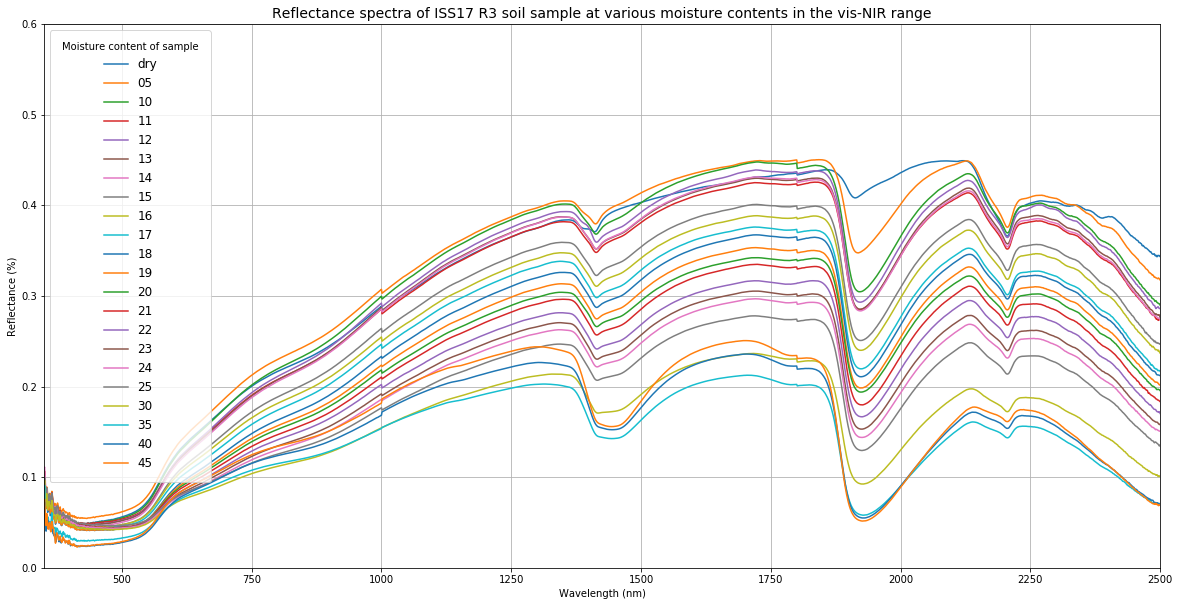

In [18]:
#plot all moisture contents on one plot
x = mean_pivot.index

plt.figure(figsize=(20,10))
plt.xlim(350,2500)
plt.ylim(0,0.6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' '+round +' soil sample at various moisture contents in the vis-NIR range',fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', borderpad=True,fontsize = 12)

os.chdir('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/compiled/mean_reflectance/plots/')
plt.savefig(sample+'_'+round+'_summary_reflectance_plot.pdf',format= 'pdf', orientation = ['landscape'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


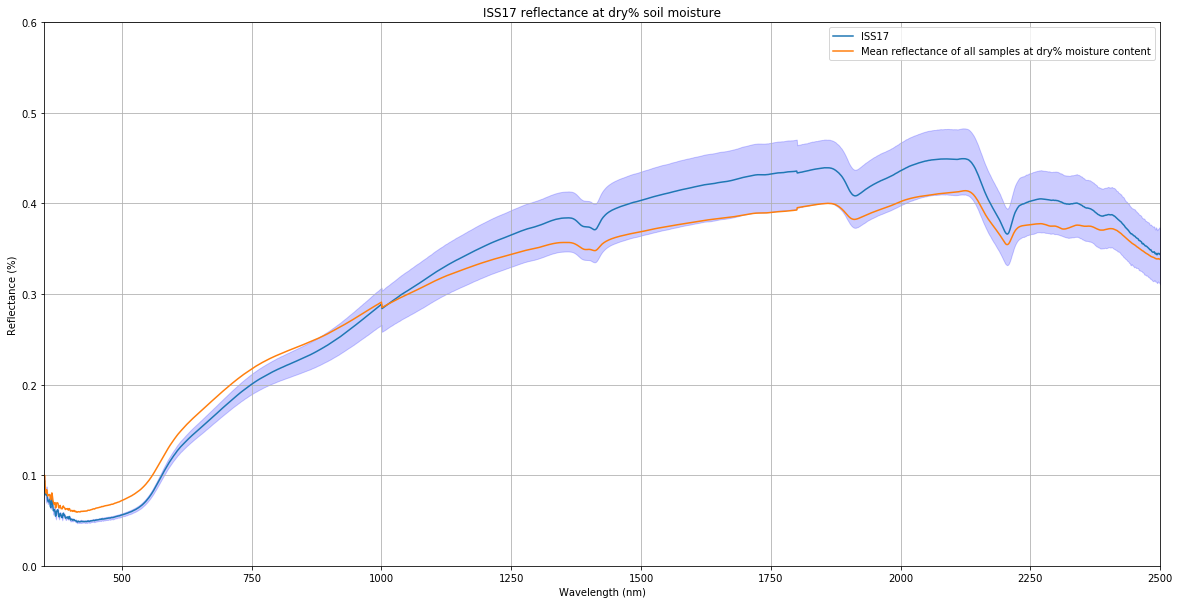

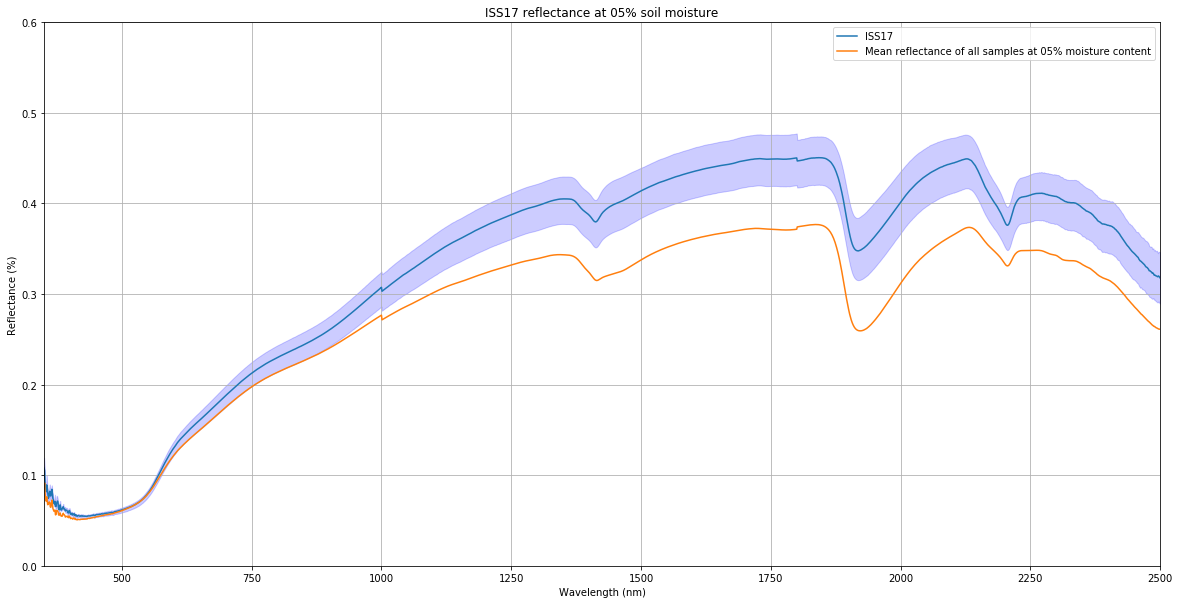

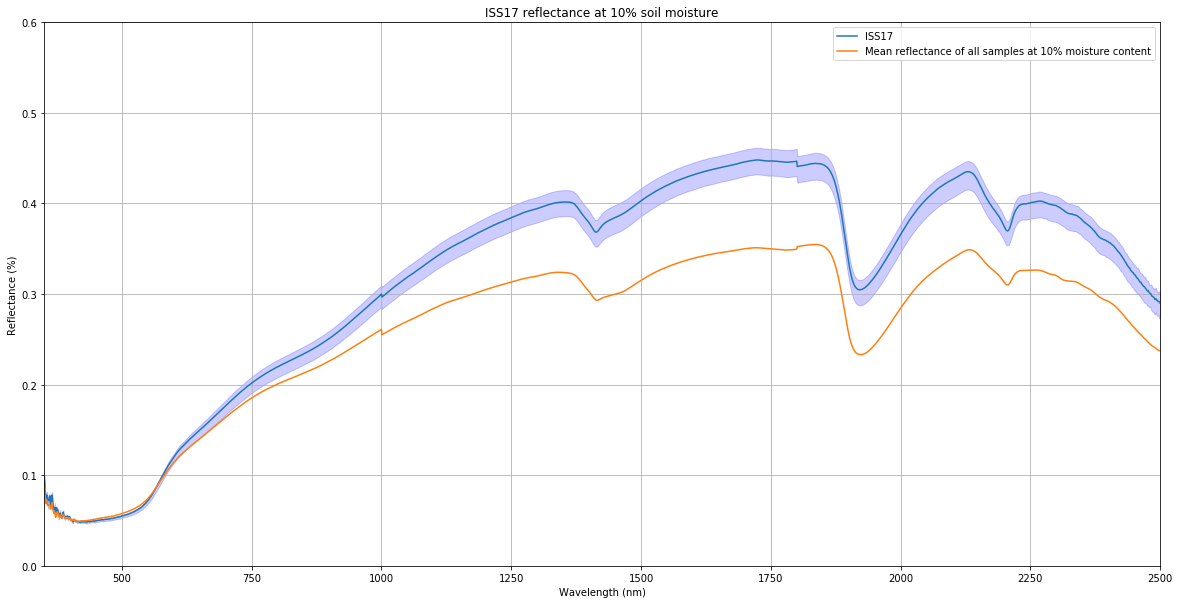

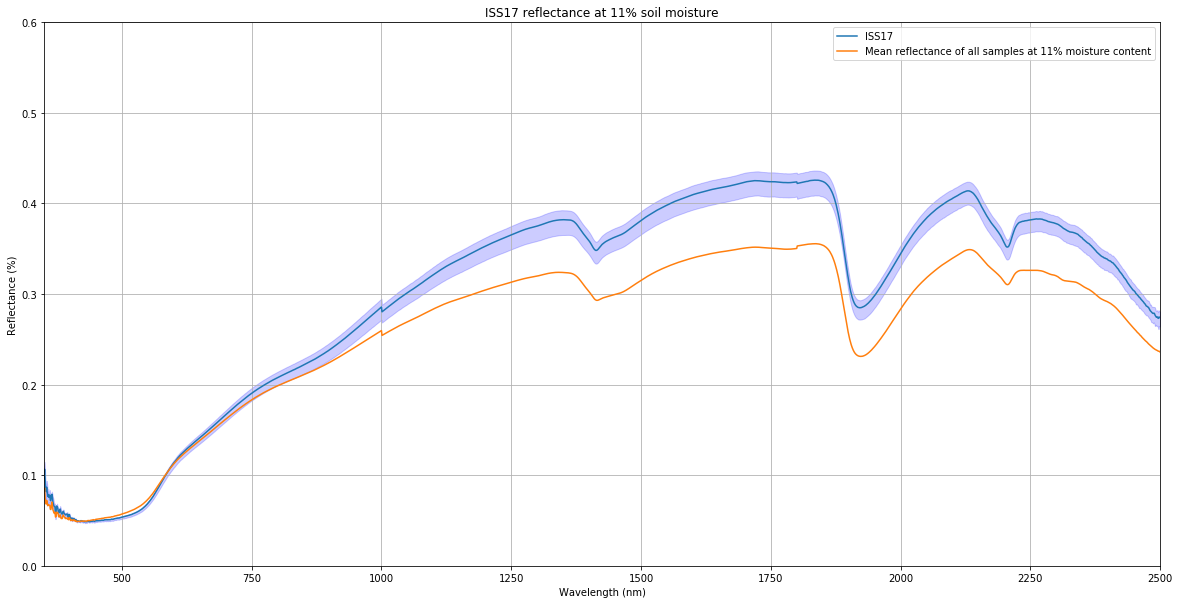

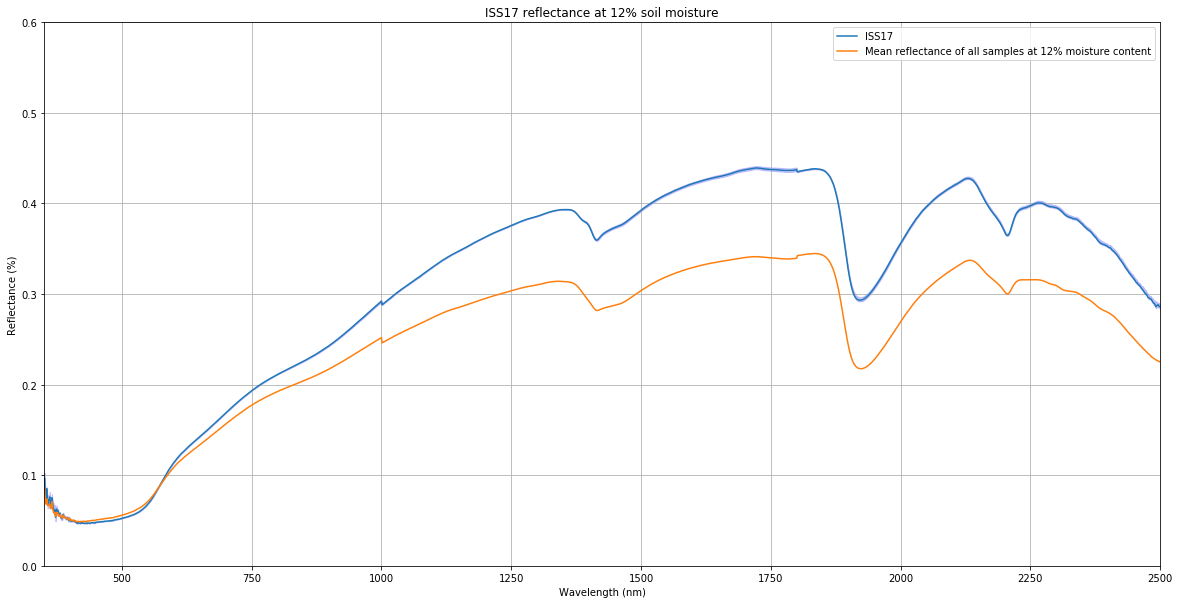

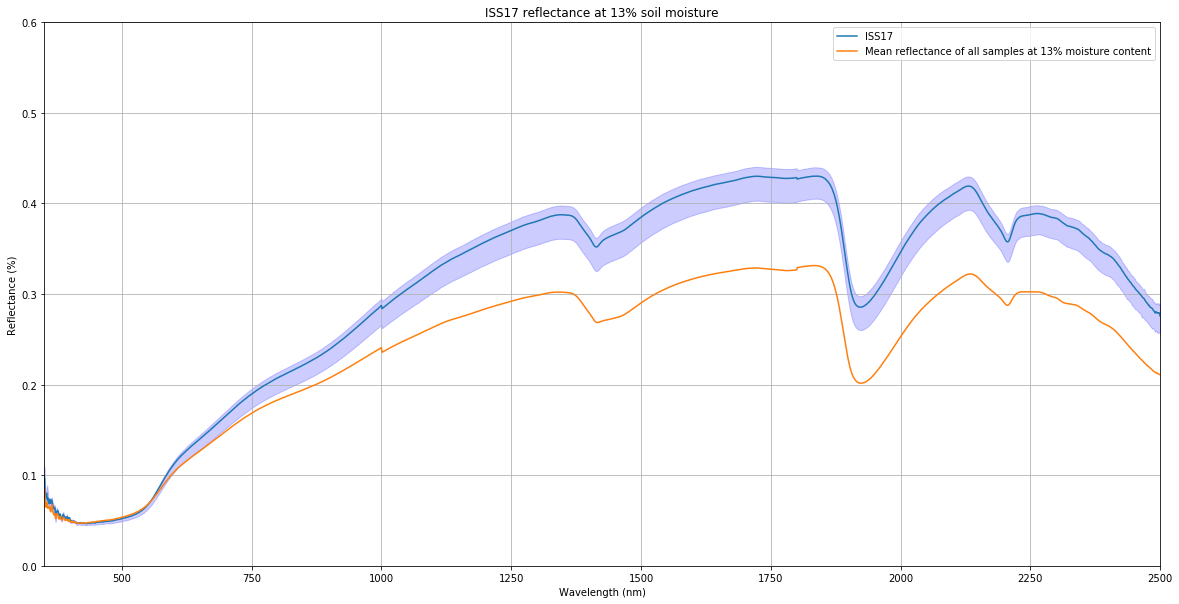

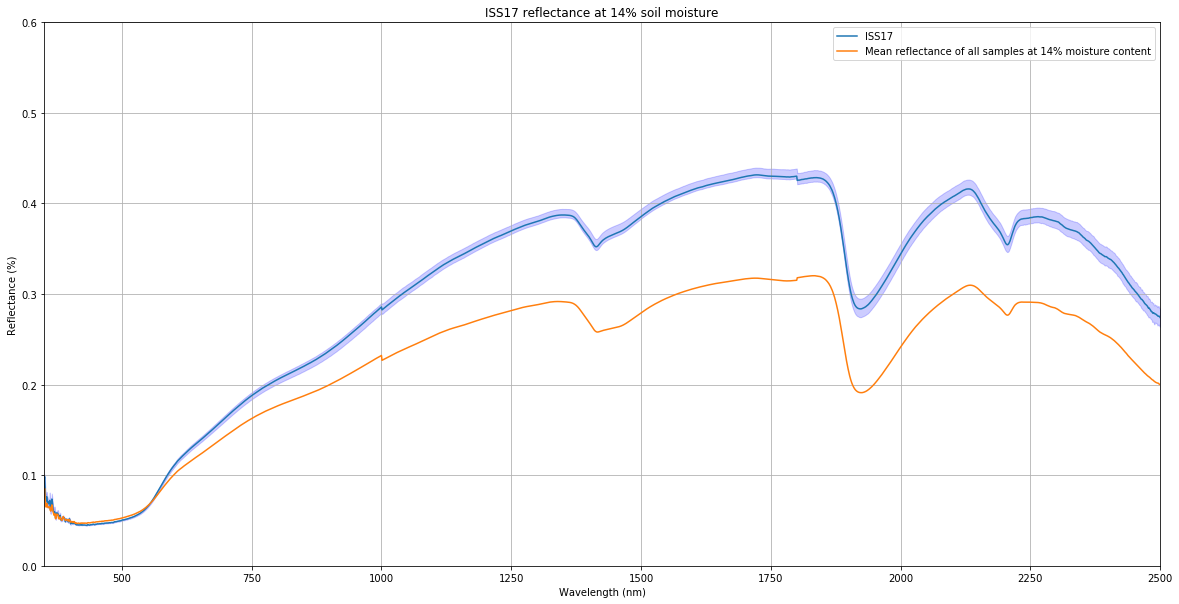

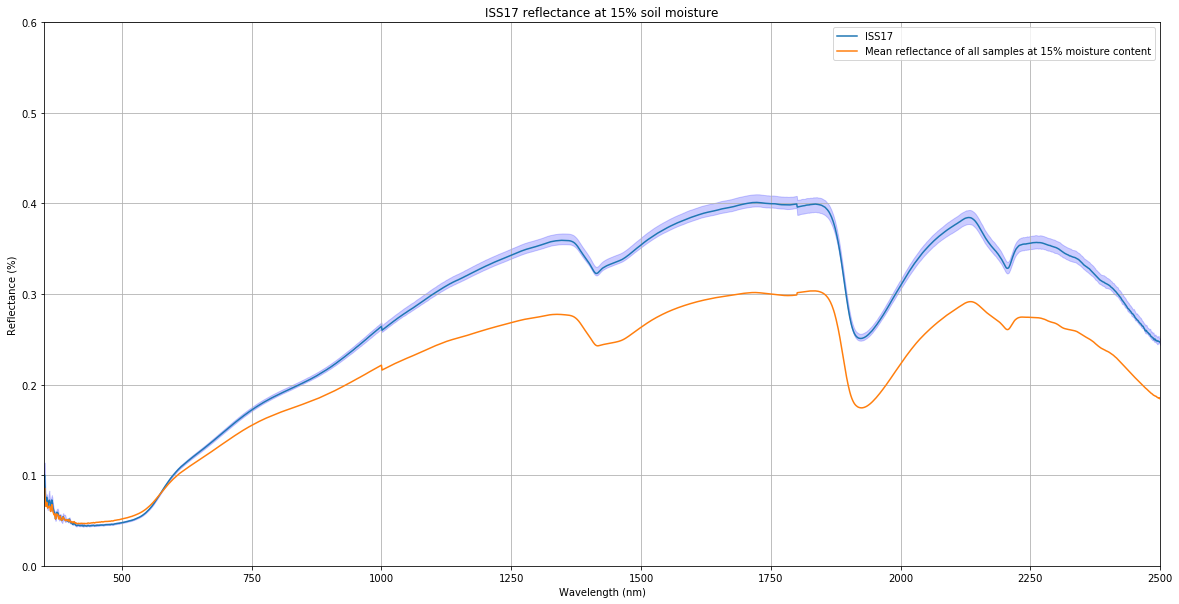

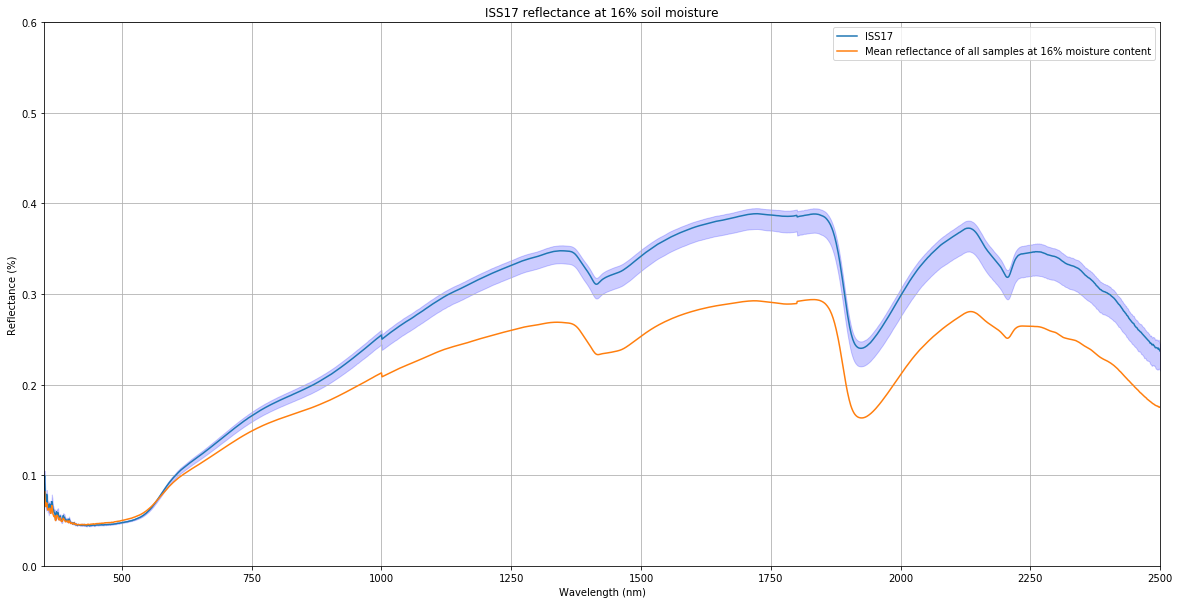

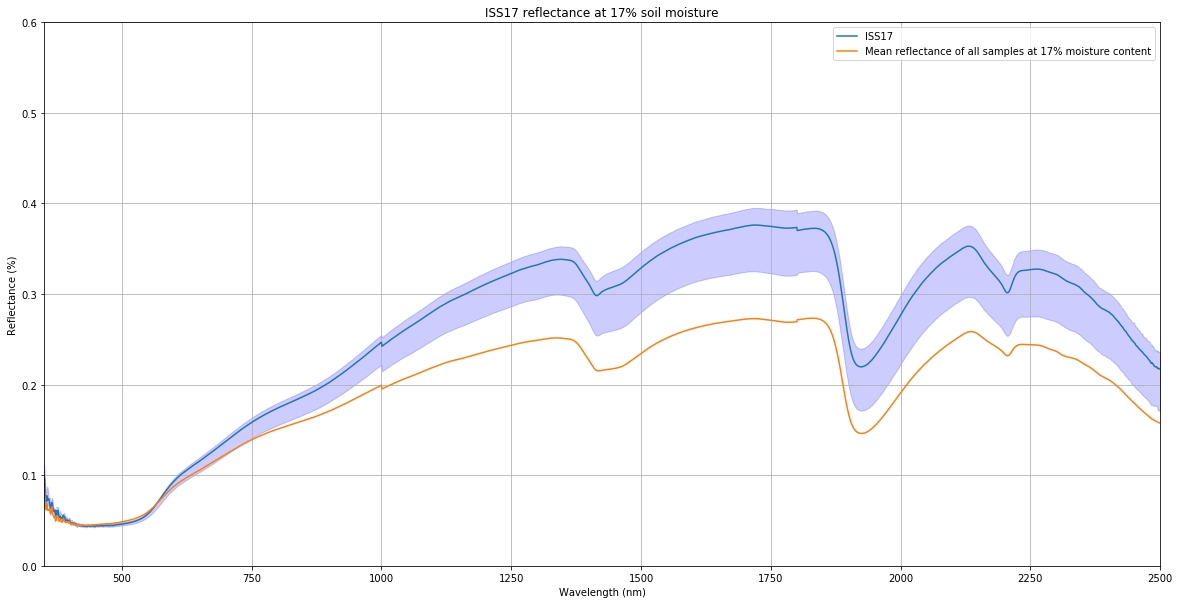

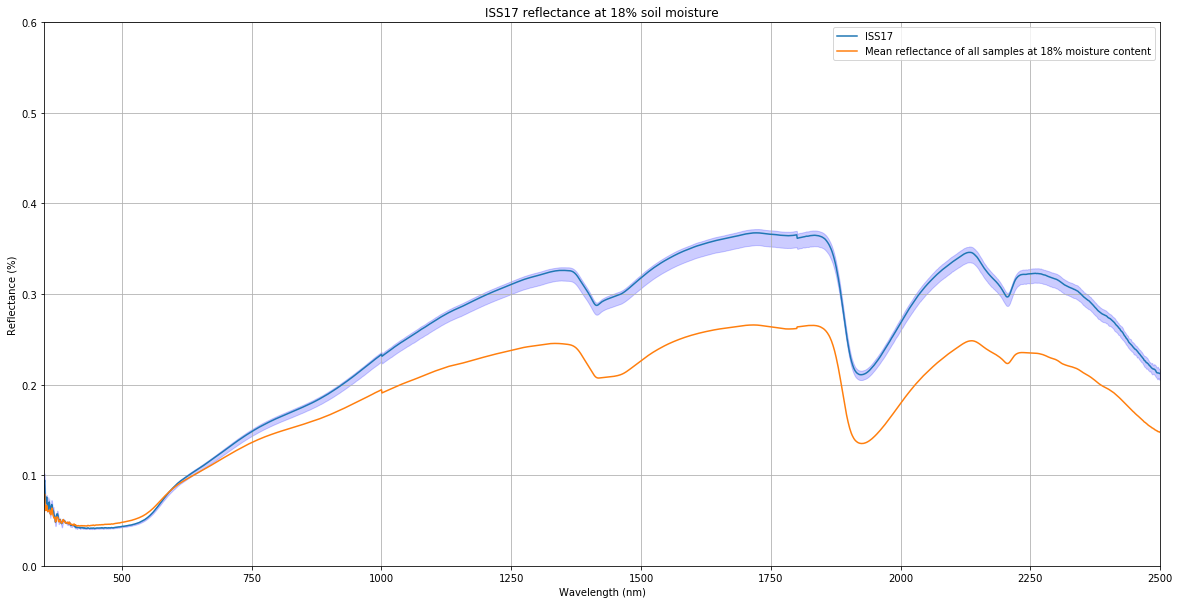

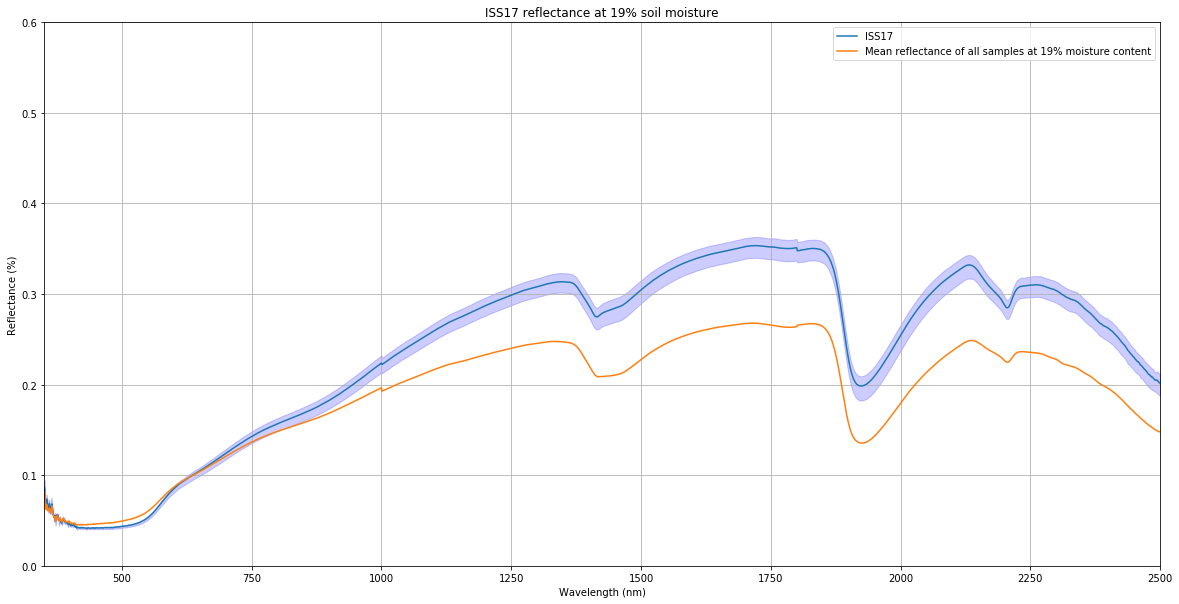

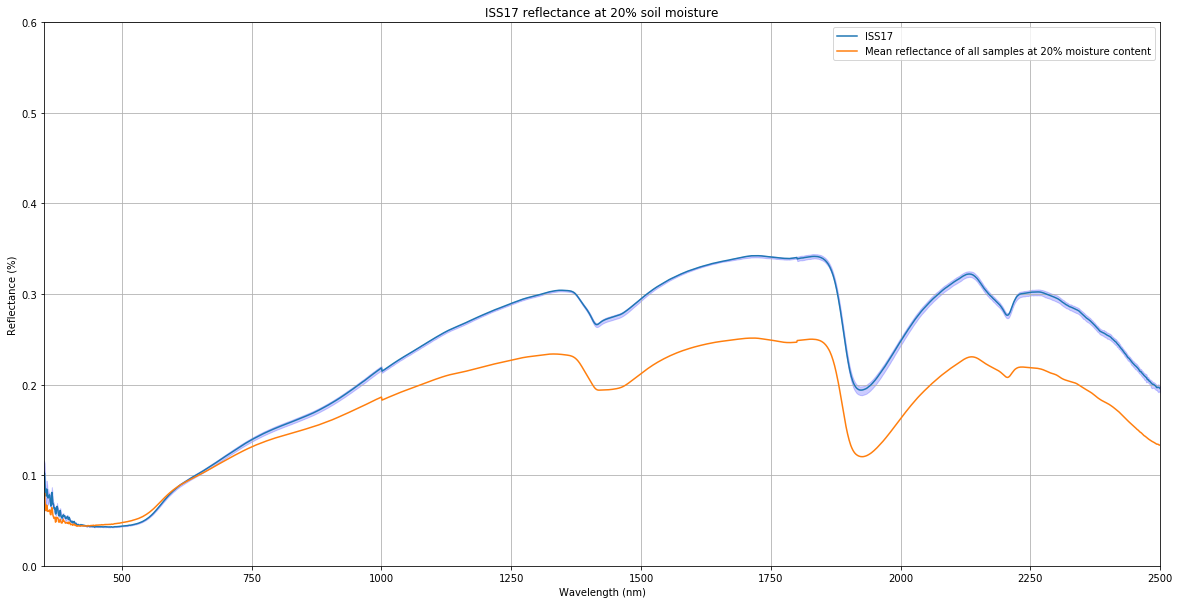

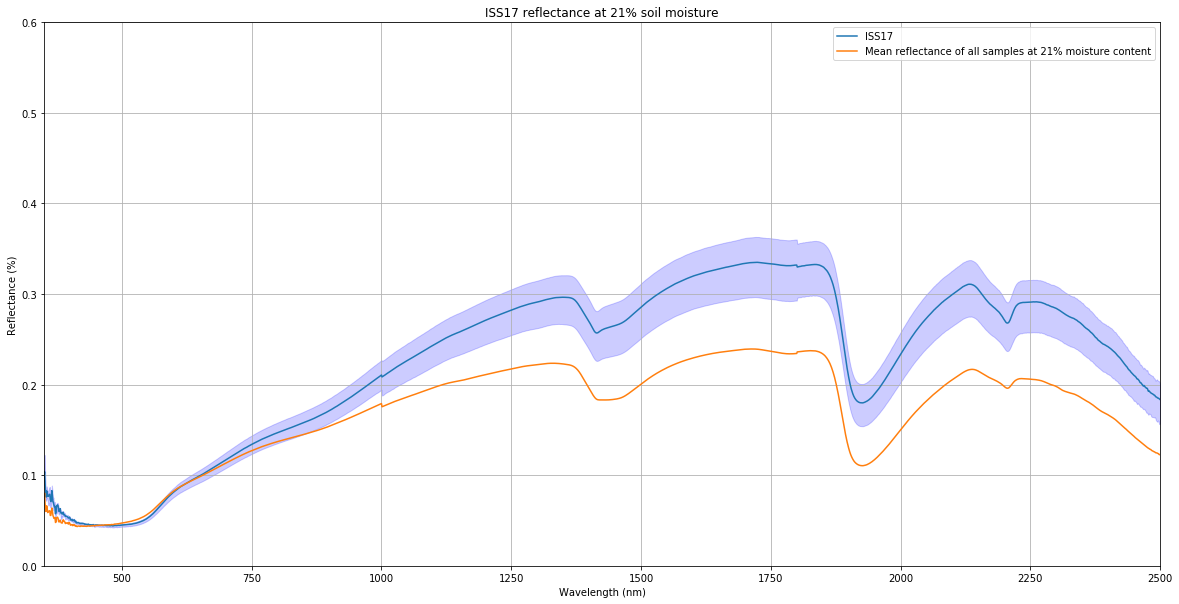

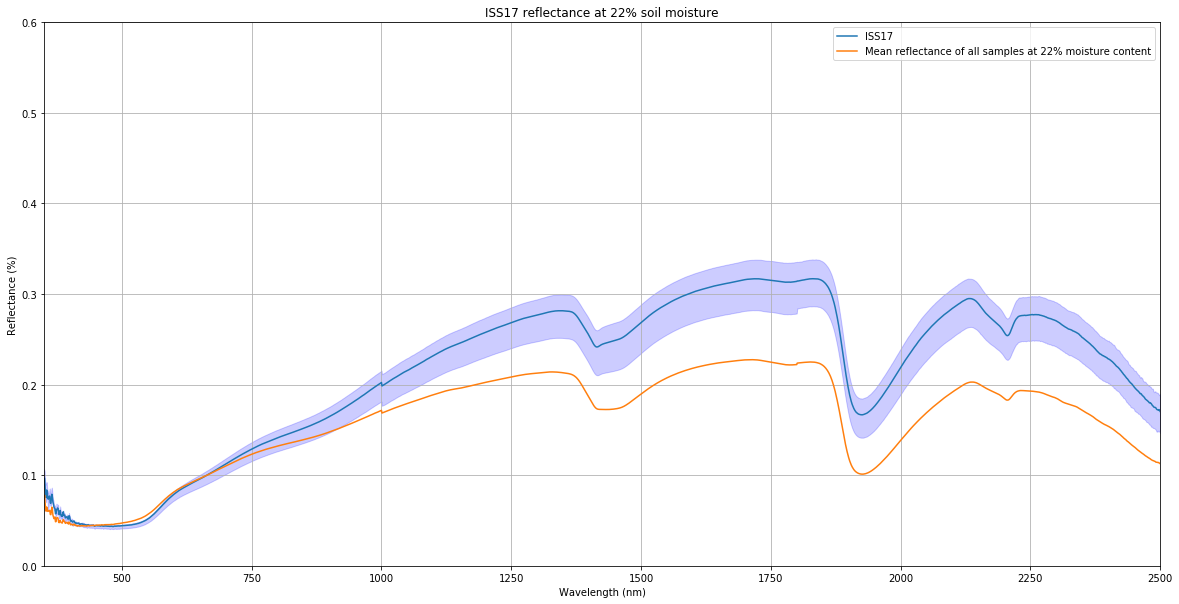

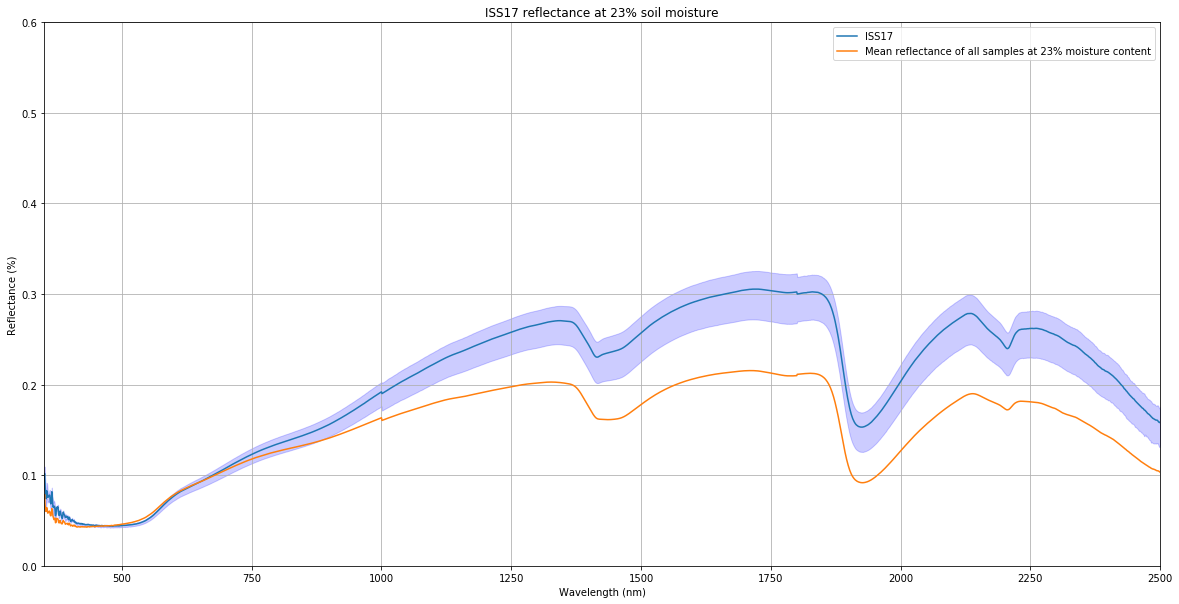

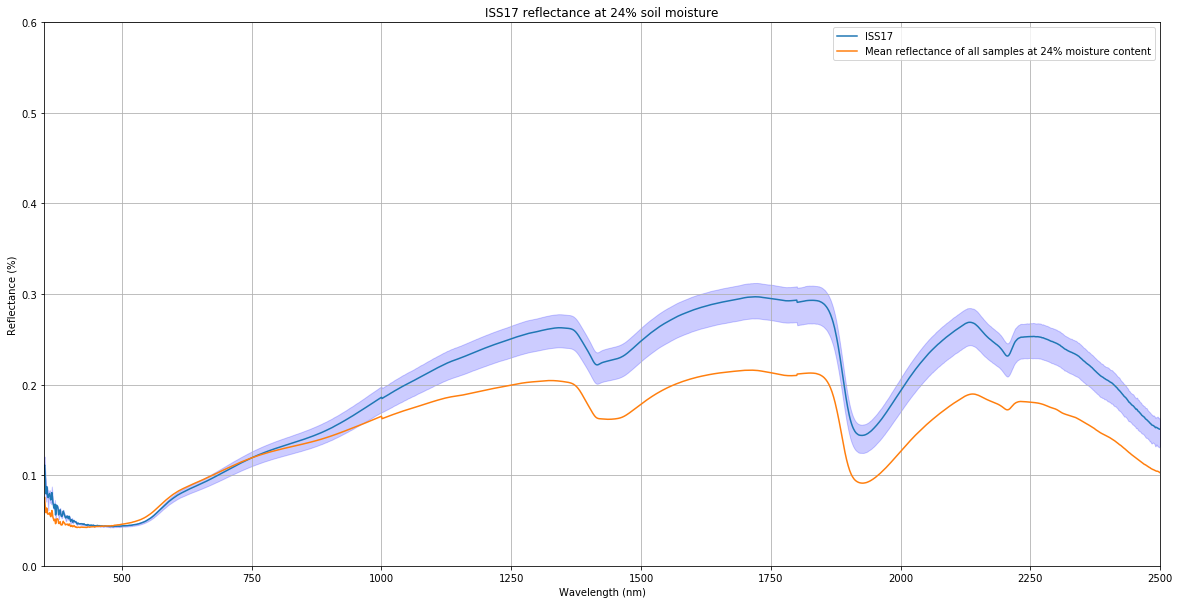

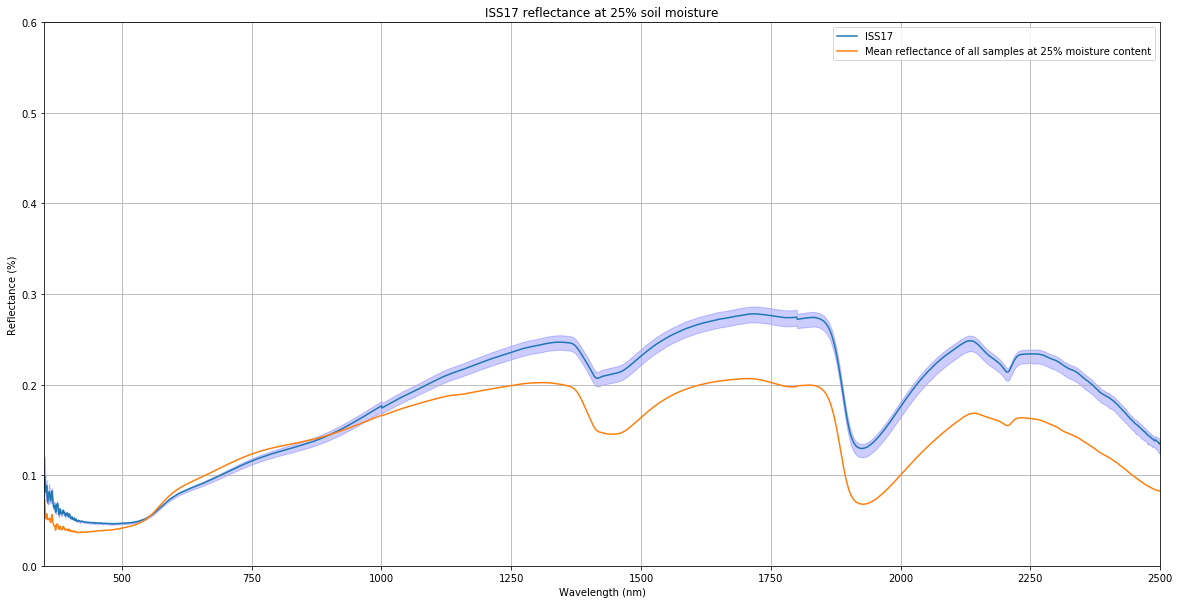

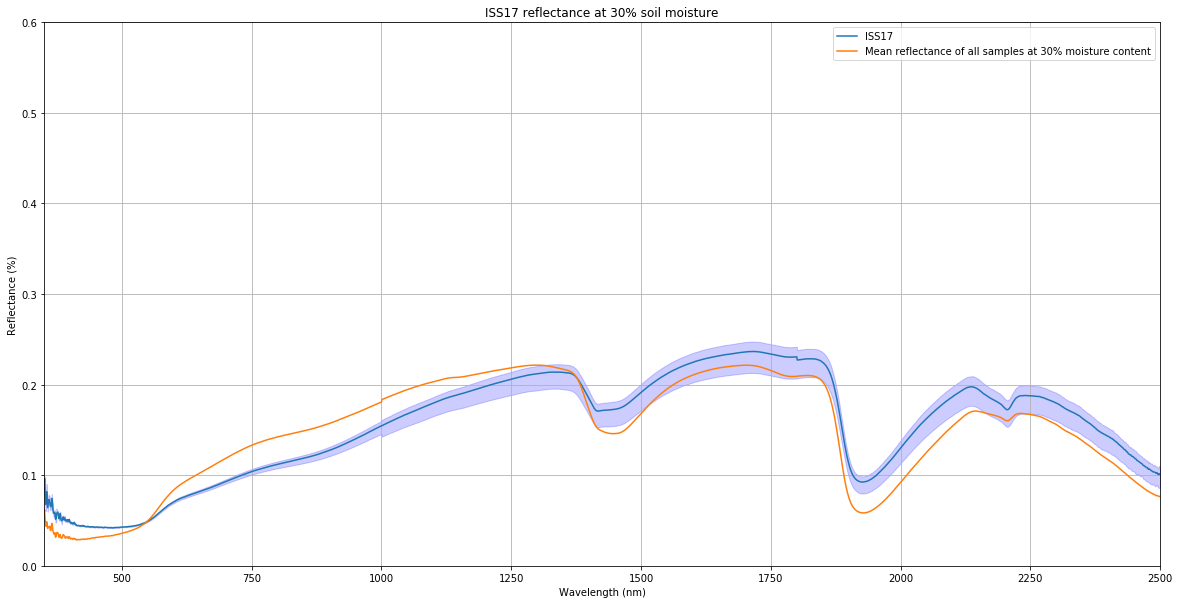

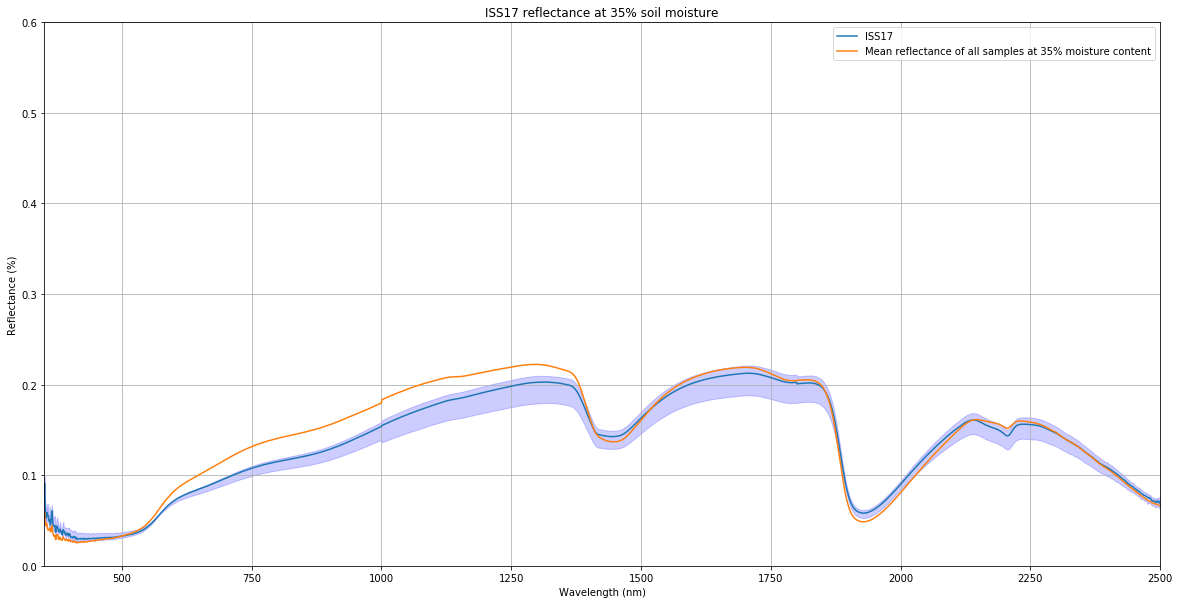

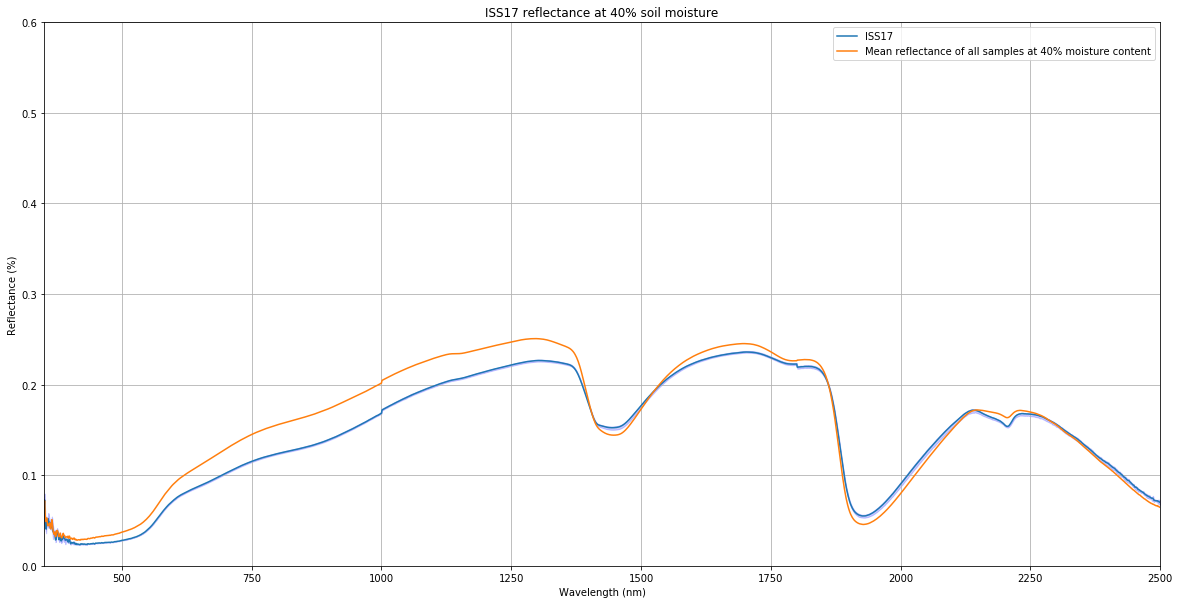

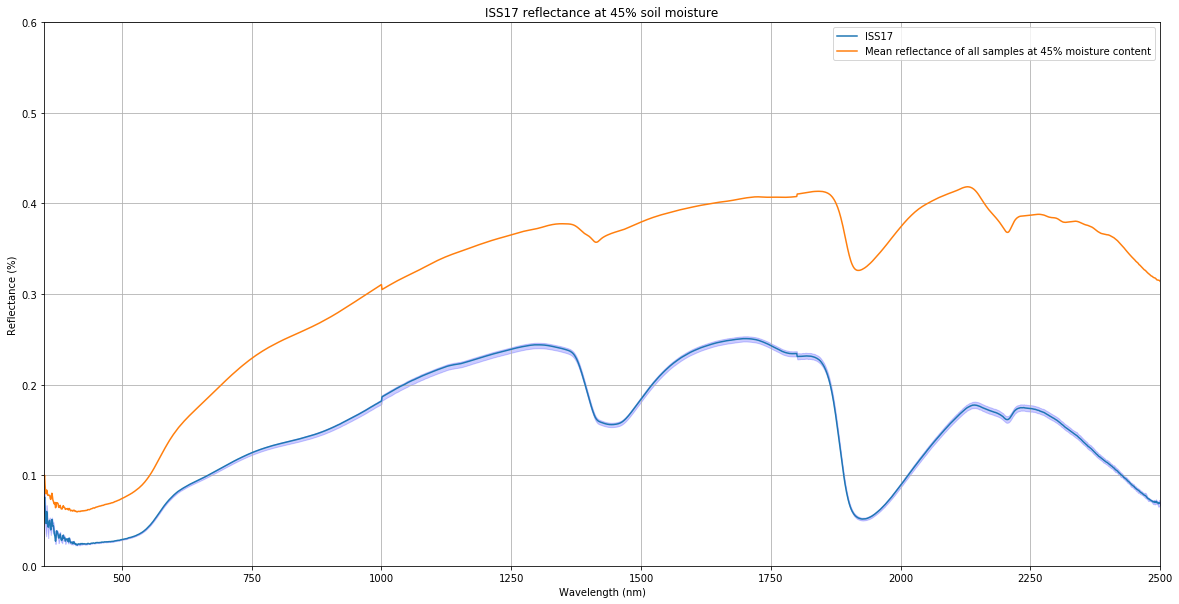

In [19]:
#7. Plots comparing reflectance to mean reflectance at the same moisture content
x = mean_pivot.index

for mc in mean_pivot:
    labels=[sample,'Mean reflectance of all samples at '+mc+'% moisture content']
    plt.figure(figsize=(20,10))
    plt.xlim(350,2500)
    plt.ylim(0,0.6)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance (%)')
    plt.grid(True)
    plt.title(sample+' reflectance at '+mc+'% soil moisture')
    plt.plot(x, mean_pivot[mc])
    plt.plot(x, av[mc])
    plt.legend(labels=labels)
    y1 = max_pivot[mc]
    y2 = min_pivot[mc]
    plt.fill_between(x, y1, y2, alpha = 0.2, color='blue')
    #os.chdir(dirOut)
    #plt.savefig(mc + '_reflectance_plot.pdf',format= 'pdf', orientation = ['landscape'])

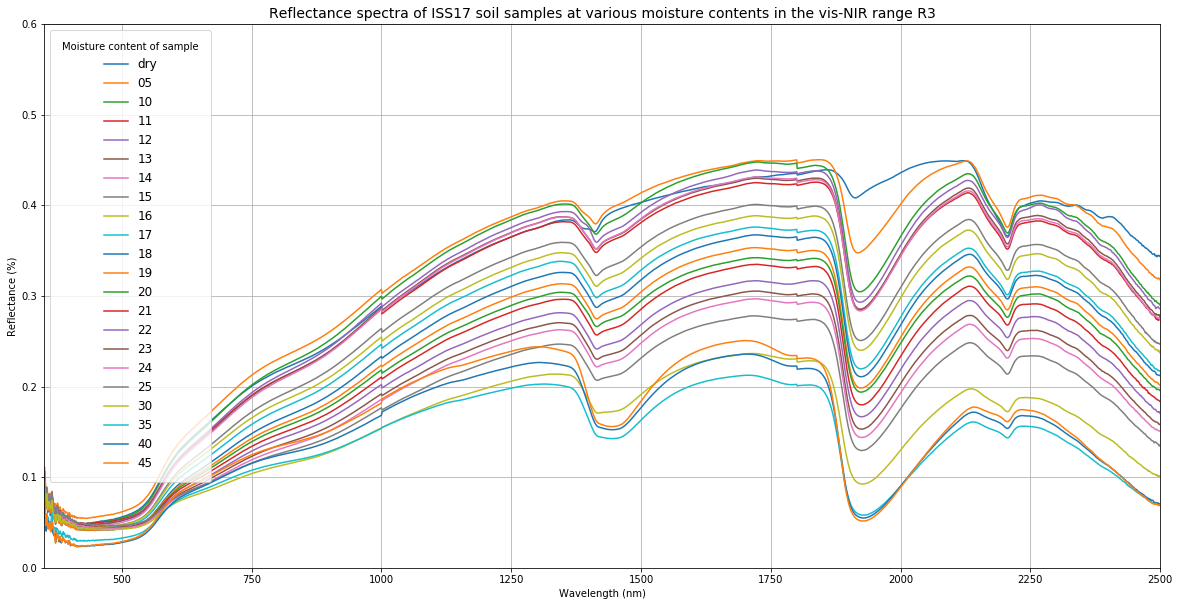

In [20]:
#plot all moisture contents on one plot
x = mean_pivot.index
#labels=[mean_pivot[mc], 'Mean reflectance of '+sample+' at various moisture contents in the vis-NIR range']

plt.figure(figsize=(20,10))
plt.xlim(350,2500)
plt.ylim(0,0.6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range '+round,fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', borderpad=True,fontsize = 12)
    os.chdir(dirOut)
plt.savefig(sample + '_summary_reflectance_plot.pdf',format= 'pdf', orientation = ['landscape'])

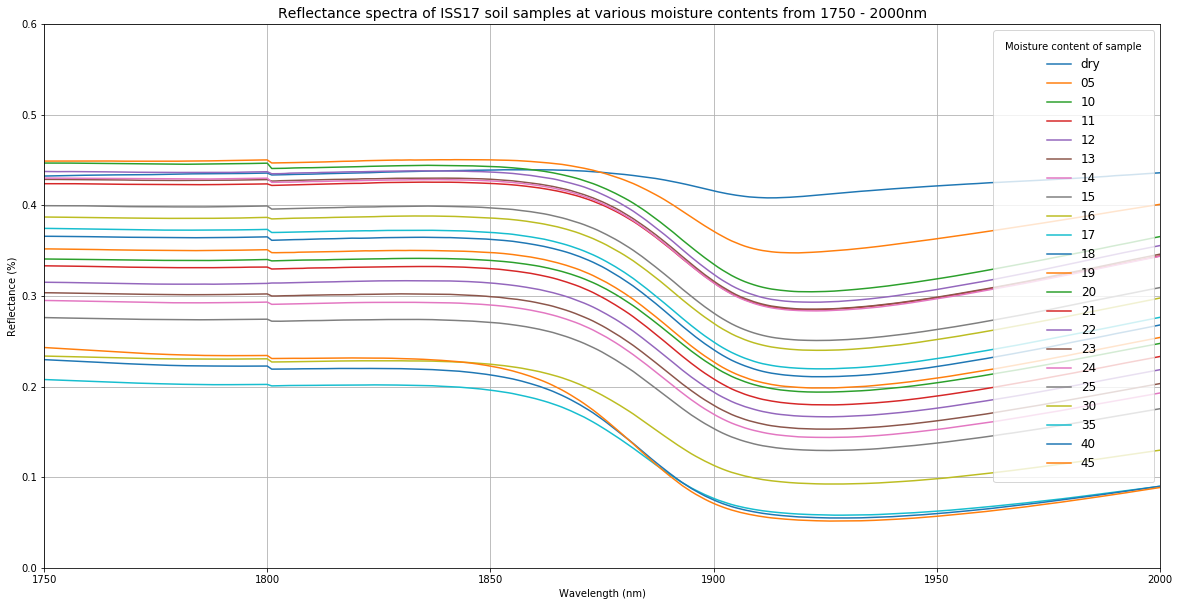

In [21]:
#limit plot to focus on areas of interest
#1750-1900
x = mean_pivot.index

plt.figure(figsize=(20,10))
plt.xlim(1750,2000)
plt.ylim(0,0.6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents from 1750 - 2000nm',fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', loc='upper right', borderpad=True,fontsize = 12)
    #os.chdir('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/'+round+'_data/pre_processed_files/'+sample)
#plt.savefig(sample + '_summary_reflectance_plot_1750_2000.pdf',format= 'pdf', orientation = ['landscape'])#the effects of water absorption can be clearly seen from 1360nm->

#step in reflectance caused by absorbance feature is slighty >1800nm, so local max assumed >1820nm 

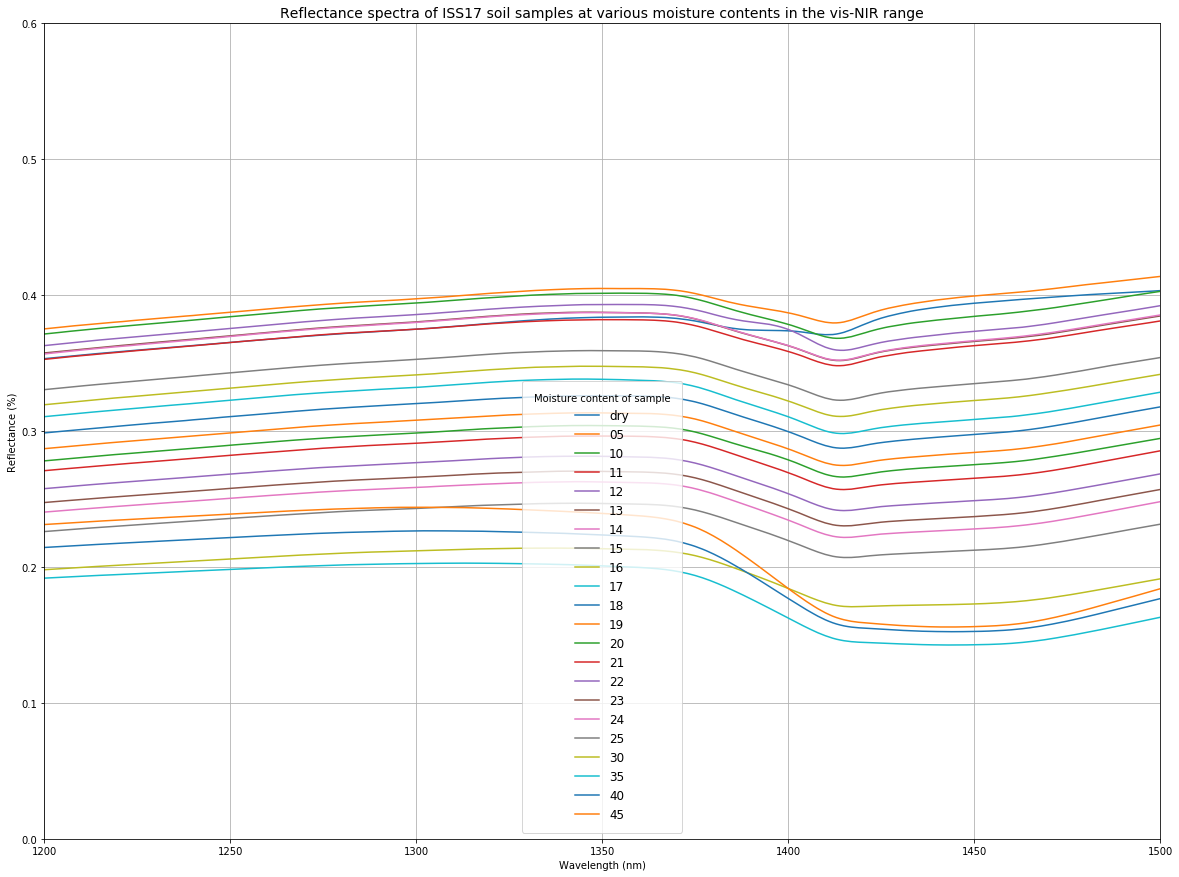

In [22]:
#limit plot to focus on areas of interest
#1200-1500
x = mean_pivot.index

plt.figure(figsize=(20,15))
plt.xlim(1200,1500)
plt.ylim(0,0.6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range',fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', borderpad=True,fontsize = 12)
    #os.chdir(dirOut)
#plt.savefig(sample + '_summary_reflectance_plot_1200_1500.pdf',format= 'pdf', orientation = ['landscape'])#the effects of water absorption can be clearly seen from 1360nm->
#is this the point the soil became saturated and water was pooling on the surface?

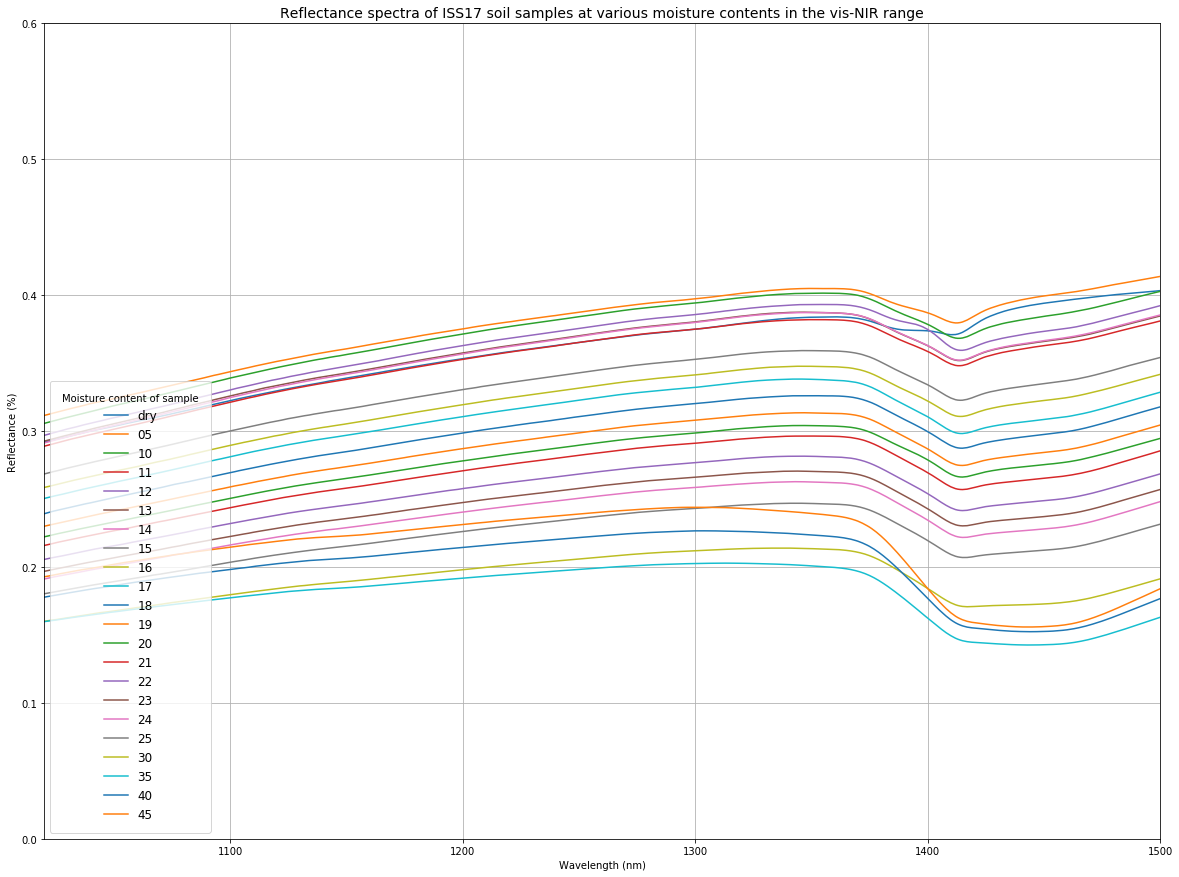

In [23]:
#limit plot to focus on areas of interest
#1000-1800nm
x = mean_pivot.index

plt.figure(figsize=(20,15))
plt.xlim(1020,1500)
plt.ylim(0,0.6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range',fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', loc=3, borderpad=True,fontsize = 12)


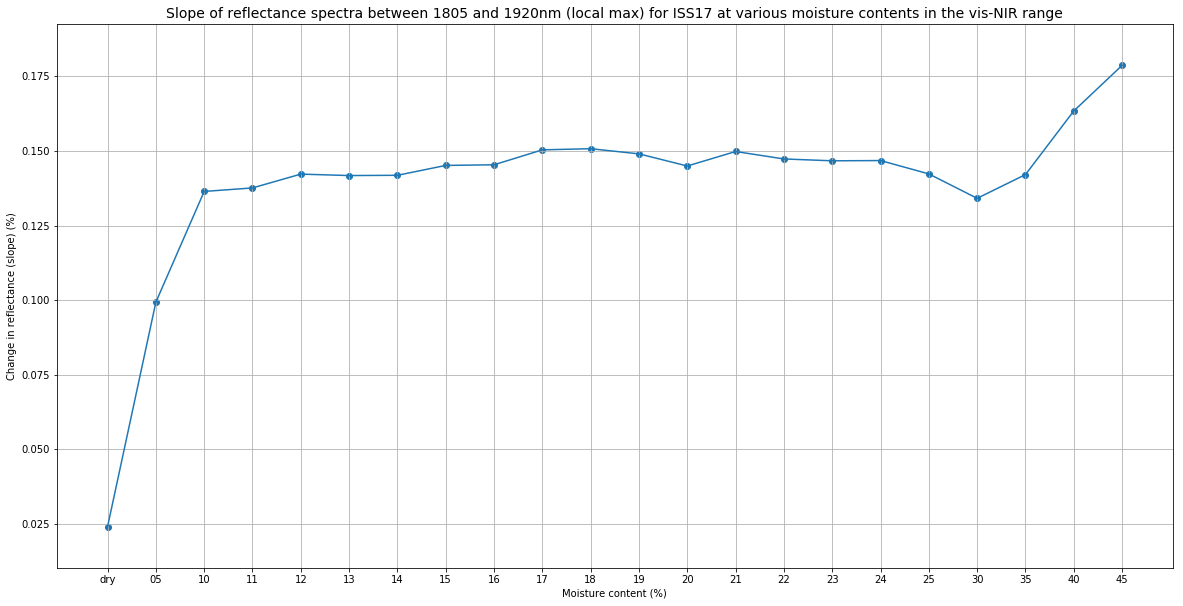

In [24]:
#calculate slope of line, on the lower slide of the large absorption feature ~1926nm
#row selection 1805nm (no sign of absorption feature) -350nm = 1455
#row selection 1920nm (centre of absorption feature)-350nm = 1550
slope1a =  mean_pivot.iloc[1455]
slope1b =  mean_pivot.iloc[1570]
slope1c = slope1a-slope1b

x = mean_pivot.columns
y1 = slope1c


plt.figure(figsize=(20,10))
plt.xlabel('Moisture content (%)')
plt.ylabel('Change in reflectance (slope) (%)')
plt.grid(True)
plt.title('Slope of reflectance spectra between 1805 and 1920nm (local max) for '+sample+' at various moisture contents in the vis-NIR range',fontsize=14)
plt.scatter(x,y1)
plt.plot(x,y1)
plt.savefig('Slope_between_1805_and_1920nm.pdf')
#this plot could be improved by spacing the data points according to their interval
#The shape of the line is not representative of the relationship at the moment

In [25]:
#slice df between 1805 - 1950 as both local max and min are in this range
chosen_wavelength_1 = 1805
chosen_wavelength_2 = 1950

row_index_1 = (chosen_wavelength_1 - 350) 
row_index_2 = (chosen_wavelength_2 - 350) 

print(row_index_1, row_index_2)

1455 1600


In [33]:
slice_1900 = mean_pivot.iloc[row_index_1:row_index_2]
slice_1900.head(2)

dry        05        10        11        12        13  \
Wavelength                                                               
1805        0.434094  0.447164  0.441201  0.422583  0.435593  0.427395   
1806        0.434198  0.447258  0.441328  0.422720  0.435728  0.427512   

                  14        15        16        17  ...        20        21  \
Wavelength                                          ...                       
1805        0.425658  0.396362  0.385731  0.370426  ...  0.339269  0.330291   
1806        0.425772  0.396486  0.385861  0.370537  ...  0.339394  0.330397   

                  22        23        24        25        30        35  \
Wavelength                                                               
1805        0.314594  0.300319  0.291161  0.272454  0.227387  0.201207   
1806        0.314726  0.300428  0.291258  0.272550  0.227460  0.201225   

                  40        45  
Wavelength                      
1805        0.219407  0.231204  
1806        0.219487  0.231201  

[2 rows x 22 columns]

In [34]:
#make a df with the wavelength of the min value in the range of 1805 - 1950nm 
mins_1900 = pd.DataFrame(columns=['MC','Wavelength_w_min_value'])
for cols in slice_1900:
    a = slice_1900[[cols]].idxmin()
    #a = list(a)
    a = (a.to_string())
    b = a[-4:]
    mins_1900 = mins_1900.append({'MC':cols,'Wavelength_w_min_value':b},ignore_index =True)
mins_1900.head(2)

MC Wavelength_w_min_value
0  dry                   1913
1   05                   1918

In [35]:
#make a df with the wavelength of the max value in the range of 1805 - 1950nm 
max_1900 = pd.DataFrame(columns=['MC','Wavelength_w_max_value'])
for cols in slice_1900:
    a = slice_1900[[cols]].idxmax()
    #a = list(a)
    a = (a.to_string())
    b = a[-4:]
    max_1900 = max_1900.append({'MC':cols,'Wavelength_w_max_value':b},ignore_index =True)
max_1900.head(2)

MC Wavelength_w_max_value
0  dry                   1860
1   05                   1842

In [38]:
#export df and save as .csv
#os.chdir(r'C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/'+round+'_data/pre_processed_files/'+sample)
#max_1900.to_csv('max_1900.csv')

In [39]:
max_1900

MC Wavelength_w_max_value
0   dry                   1860
1    05                   1842
2    10                   1836
3    11                   1835
4    12                   1836
5    13                   1835
6    14                   1838
7    15                   1836
8    16                   1832
9    17                   1833
10   18                   1834
11   19                   1832
12   20                   1833
13   21                   1836
14   22                   1834
15   23                   1830
16   24                   1832
17   25                   1833
18   30                   1829
19   35                   1824
20   40                   1822
21   45                   1818

In [44]:
#relative position at 1020nm compared to relative position at 1450nm
#slope between 1020nm and 1450nm

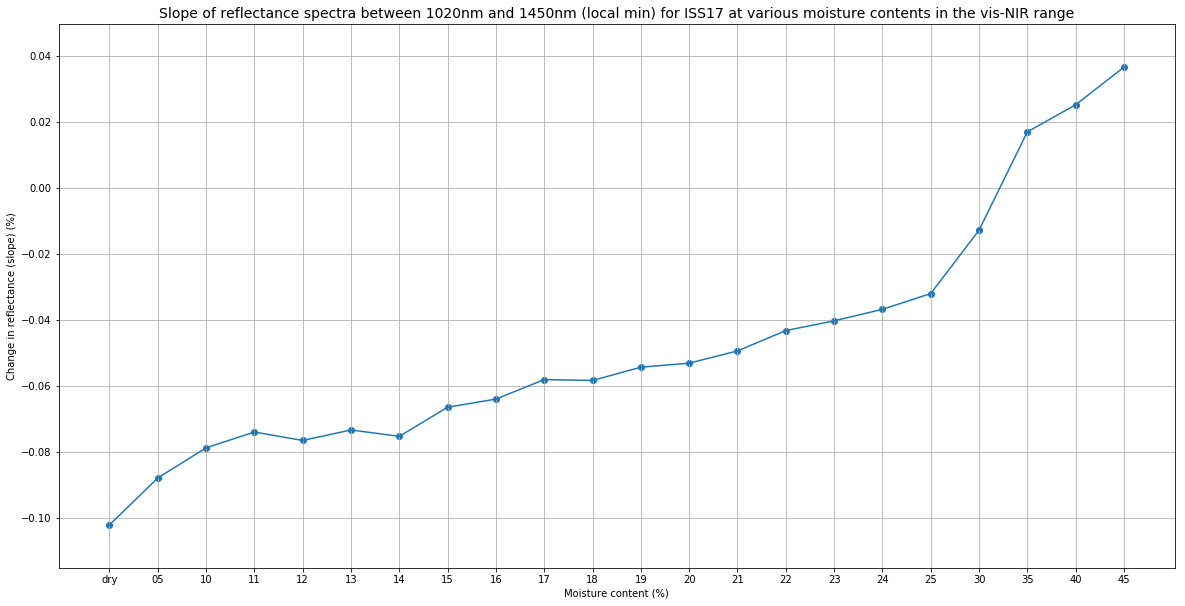

In [46]:
#calculate slope of line, on the lower slide of the large absorption feature ~1926nm
#row selection 1020nm (no sign of absorption feature) -350nm = 670
#row selection 1450nm (centre of absorption feature)-350nm = 1100
slope1a =  mean_pivot.iloc[670]
slope1b =  mean_pivot.iloc[1100]
slope1c = slope1a-slope1b

x = mean_pivot.columns
y1 = slope1c


plt.figure(figsize=(20,10))
plt.xlabel('Moisture content (%)')
plt.ylabel('Change in reflectance (slope) (%)')
plt.grid(True)
plt.title('Slope of reflectance spectra between 1020nm and 1450nm (local min) for '+sample+' at various moisture contents in the vis-NIR range',fontsize=14)
plt.scatter(x,y1)
plt.plot(x,y1)
#plt.savefig('Slope_between_1020_and_1450nm.pdf')
#this plot could be improved by spacing the data points according to their interval
#The shape of the line is not representative of the relationship at the moment

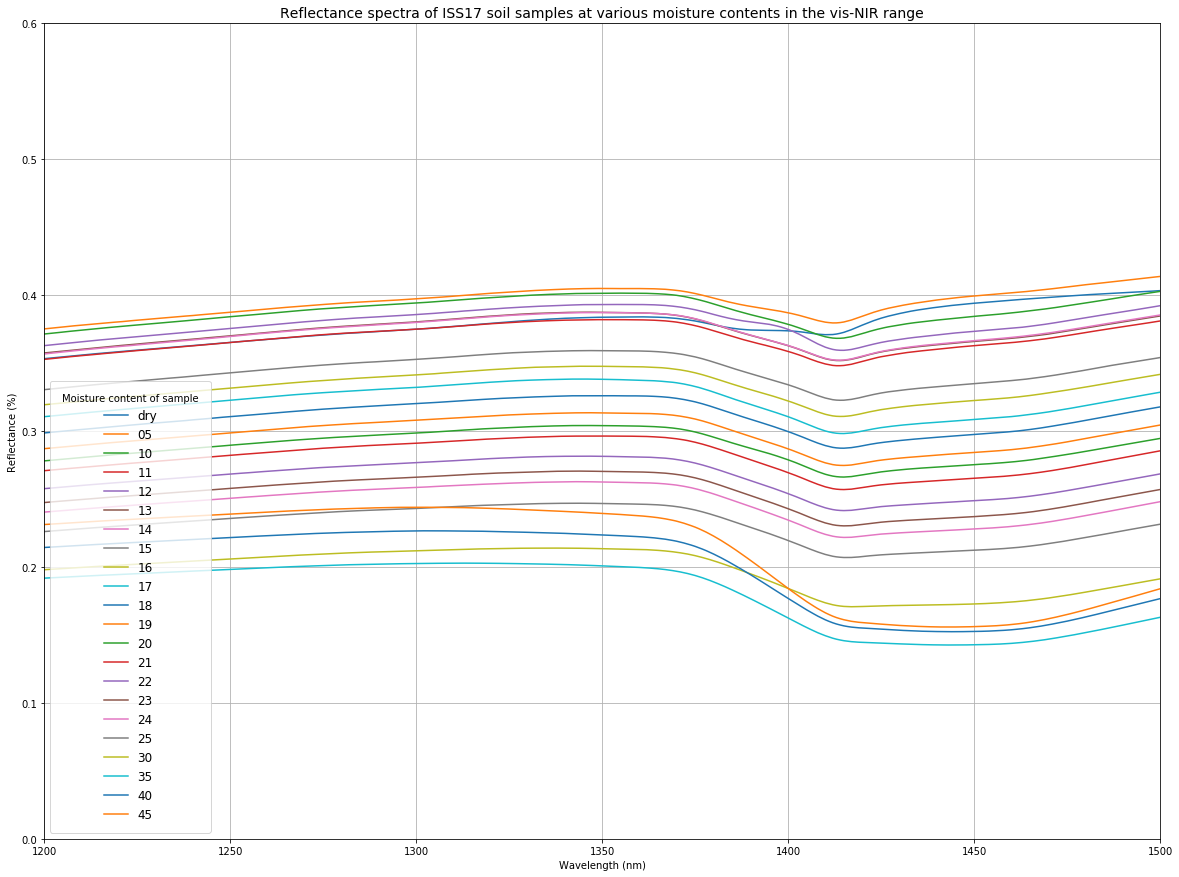

In [47]:
x = mean_pivot.index

plt.figure(figsize=(20,15))
plt.xlim(1200,1500)
plt.ylim(0,0.6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range',fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', loc=3, borderpad=True,fontsize = 12)
#as moisture content increases, min value of curve shifts to a higher wavelength

In [48]:
#Wavelength of min value around 1450nm absorption feature
#refine in future by finind the local max of each spectra ~1350nm

#perhaps moisture content can be judged by the wavelength of the min value, instead of the reflectance value at a given wavelength
#slice df at 1400 - 1500nm
#1400-350 = 1050
slice_1400 = mean_pivot.iloc[1050:1150]
slice_1400.head(2)

dry        05        10        11        12        13  \
Wavelength                                                               
1400        0.373790  0.387064  0.378574  0.358625  0.374848  0.362859   
1401        0.373633  0.386484  0.377758  0.357798  0.373748  0.362012   

                  14        15        16        17  ...        20        21  \
Wavelength                                          ...                       
1400        0.362997  0.334113  0.322199  0.310600  ...  0.278882  0.269452   
1401        0.362127  0.333212  0.321249  0.309598  ...  0.277882  0.268439   

                  22        23        24        25        30        35  \
Wavelength                                                               
1400        0.253993  0.242889  0.234555  0.219497  0.184275  0.162472   
1401        0.252957  0.241851  0.233490  0.218448  0.183188  0.161047   

                  40        45  
Wavelength                      
1400        0.176918  0.184231  
1401        0.175211  0.182231  

[2 rows x 22 columns]

In [49]:
#make a df with the wavelength of the min value in the range of 1400 - 1500nm 
mins_1400 = pd.DataFrame(columns=['MC','Wavelength_w_min_value'])
for cols in slice_1400:
    a = slice_1400[[cols]].idxmin()
    #a = list(a)
    a = (a.to_string())
    b = a[-4:]
    mins_1400 = mins_1400.append({'MC':cols,'Wavelength_w_min_value':b},ignore_index =True)
mins_1400.head(2)

MC Wavelength_w_min_value
0  dry                   1410
1   05                   1412

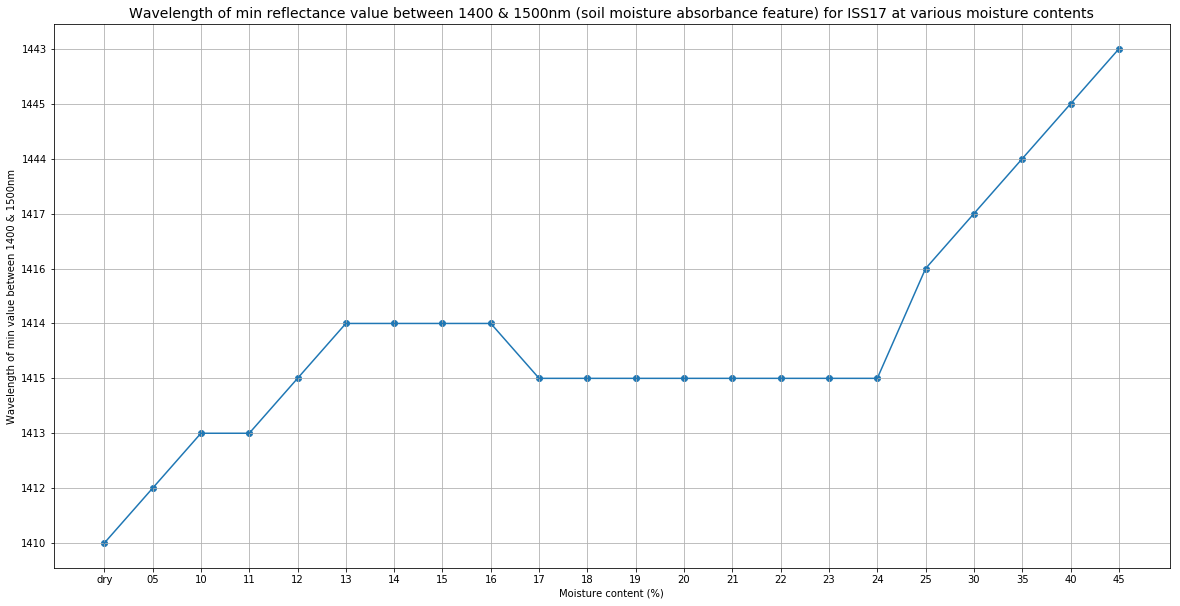

In [51]:
#plot wavelength of min reflectance value against MC
x = mins_1400.MC
y = mins_1400['Wavelength_w_min_value']

plt.figure(figsize=(20,10))
plt.xlabel('Moisture content (%)')
plt.ylabel('Wavelength of min value between 1400 & 1500nm')
plt.grid(True)
#plt.xlim()

plt.title('Wavelength of min reflectance value between 1400 & 1500nm (soil moisture absorbance feature) for '+sample+' at various moisture contents',fontsize=14)
plt.scatter(x,y)
plt.plot(x,y)
#os.chdir('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/'+round+'_data/pre_processed_files/'+sample)
#plt.savefig('initial_wavelength_of_min_reflectance_1400_1500.pdf')
#this is the first large soil moisture absorbance feature
#This line is not representative of the relationship however, as the MC intervals are not consistent

In [52]:
#this plot doesn't show the true shape of the line here, as it moves from 5% SM intervals to 1% SM intervals
#need to insert values to continuously make the plot show 1% SM intervals

In [53]:
#Wavelength of min value around 1450nm absorption feature

#perhaps moisture content can be judged by the wavelength of the min value, instead of the reflectance value at a given wavelength
#slice df at 1400 - 1500nm
#1400-350 = 1050
slice_1400 = mean_pivot.iloc[1050:1150]
slice_1400.head(2)

dry        05        10        11        12        13  \
Wavelength                                                               
1400        0.373790  0.387064  0.378574  0.358625  0.374848  0.362859   
1401        0.373633  0.386484  0.377758  0.357798  0.373748  0.362012   

                  14        15        16        17  ...        20        21  \
Wavelength                                          ...                       
1400        0.362997  0.334113  0.322199  0.310600  ...  0.278882  0.269452   
1401        0.362127  0.333212  0.321249  0.309598  ...  0.277882  0.268439   

                  22        23        24        25        30        35  \
Wavelength                                                               
1400        0.253993  0.242889  0.234555  0.219497  0.184275  0.162472   
1401        0.252957  0.241851  0.233490  0.218448  0.183188  0.161047   

                  40        45  
Wavelength                      
1400        0.176918  0.184231  
1401        0.175211  0.182231  

[2 rows x 22 columns]

In [54]:
#slice df around local max ~ 1300nm
#1200-1400nm
slice_1300 = mean_pivot.iloc[850:1050]
slice_1300.head(2)

dry        05        10        11        12        13  \
Wavelength                                                               
1200        0.353291  0.375183  0.371425  0.352772  0.362897  0.357492   
1201        0.353545  0.375444  0.371716  0.353066  0.363215  0.357725   

                  14        15        16        17  ...        20        21  \
Wavelength                                          ...                       
1200        0.356721  0.330491  0.319383  0.310605  ...  0.278083  0.270865   
1201        0.356991  0.330815  0.319666  0.310873  ...  0.278323  0.271105   

                  22        23        24        25        30        35  \
Wavelength                                                               
1200        0.257657  0.247439  0.240395  0.226066  0.197988  0.191798   
1201        0.257931  0.247686  0.240642  0.226274  0.198165  0.191920   

                  40        45  
Wavelength                      
1200        0.214361  0.231244  
1201        0.214532  0.231436  

[2 rows x 22 columns]

In [55]:
#create a new df with the wavelength corresponding to min reflectance values
max_1300 = slice_1300.idxmax(axis=0)
max_1300 = pd.DataFrame(max_1300,columns=['max_reflectance_wavelength'])
max_1300.head(2)

max_reflectance_wavelength
dry                        1360
05                         1350

In [58]:
#export df and save as .csv
#os.chdir(r'C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/'+round+'_data/pre_processed_files/'+sample)
#max_1300.to_csv('max_1300.csv')

In [59]:
#create a new df with the wavelength corresponding to min reflectance values
min_values = slice_1400.idxmin(axis=0)
min_values = pd.DataFrame(min_values,columns=['min_reflectance_wavelength'])
min_values.head(3)

min_reflectance_wavelength
dry                        1410
05                         1412
10                         1413

In [61]:
#os.chdir(r'C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/'+round+'_data/pre_processed_files/'+sample)
#min_values.to_csv('min_1400.csv')
#mean_pivot.to_csv('mean_pivot.csv')

In [68]:
#change 'dry' label to 0
#df['MC'] = min_values['MC'].replace('dry','0')

In [69]:
df.MC.unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45.])

In [71]:
#change all values in the MC column to integers (they won't sort as a string/object)
#df['MC'] = df['MC'].astype(int)
#df.MC.unique()


In [72]:
#sort by values in MC column
df = df.sort_values('MC',ascending=True)

In [73]:
df.head(2)

index  min_reflectance_wavelength   MC
0   NaN                         NaN  1.0
1   NaN                         NaN  2.0

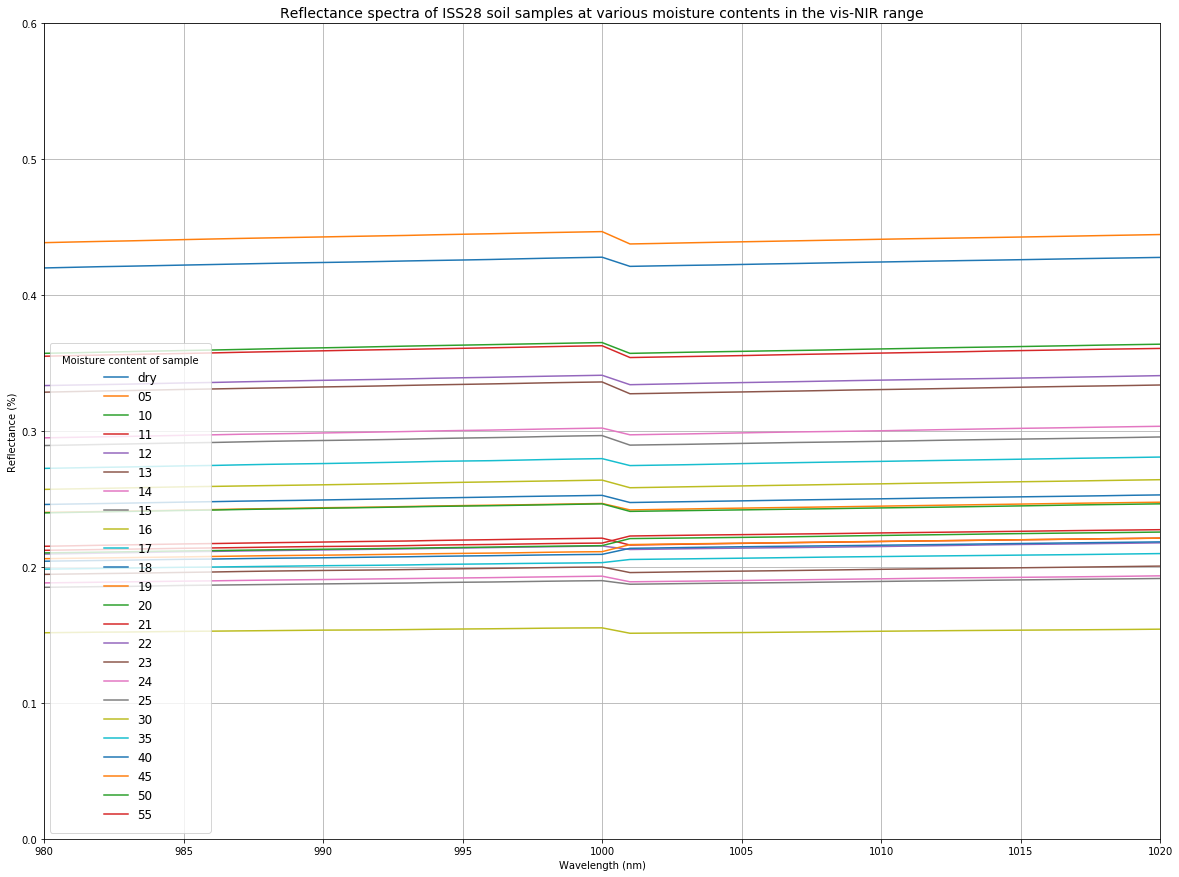

In [101]:
#limit plot to focus on areas of interest
#1000nm
x = mean_pivot.index

plt.figure(figsize=(20,15))
plt.xlim(980,1020)
plt.ylim(0,0.6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range',fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', loc=3, borderpad=True,fontsize = 12)


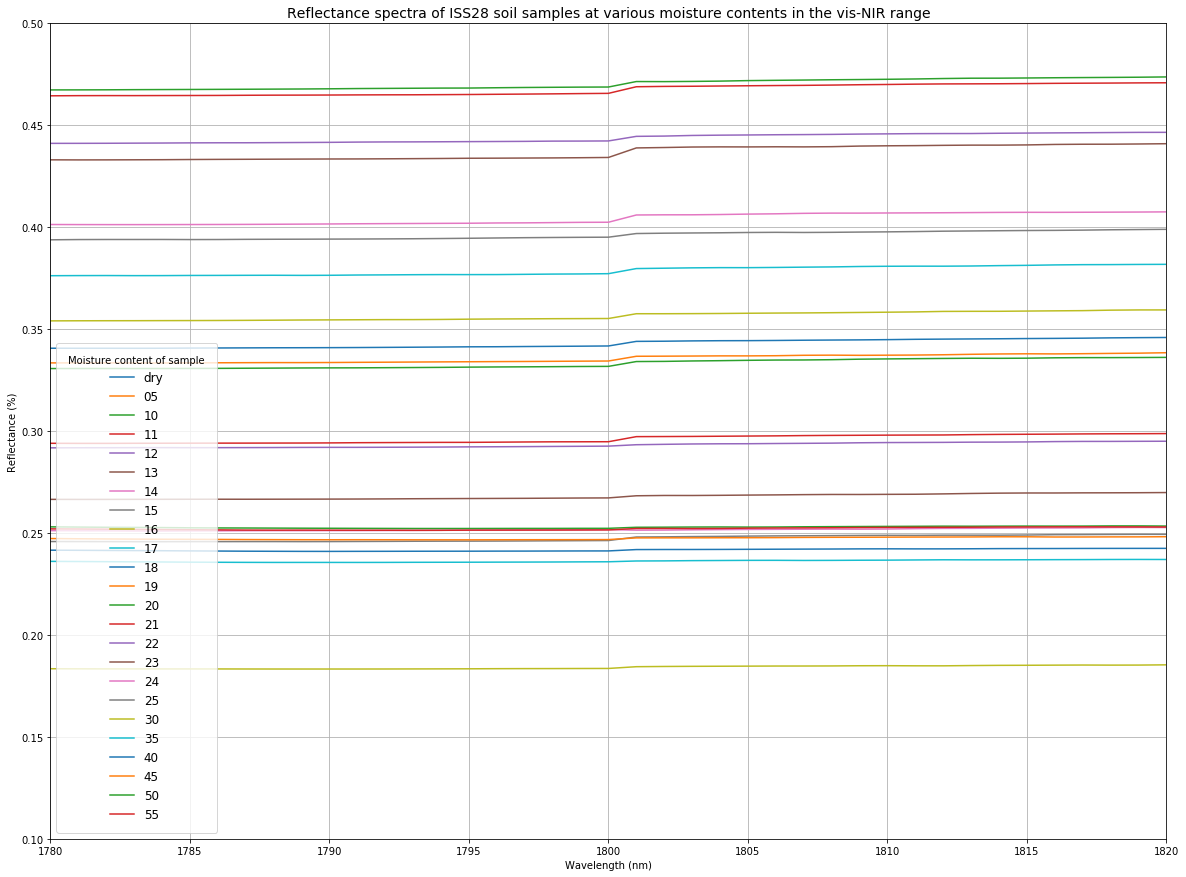

In [103]:
#limit plot to focus on areas of interest
#1800nm
x = mean_pivot.index
labels=[sample, 'Mean reflectance of '+sample+' at various moisture contents in the vis-NIR range']

plt.figure(figsize=(20,15))
plt.xlim(1780,1820)
plt.ylim(0.1,0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range',fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', loc=3, borderpad=True,fontsize = 12)


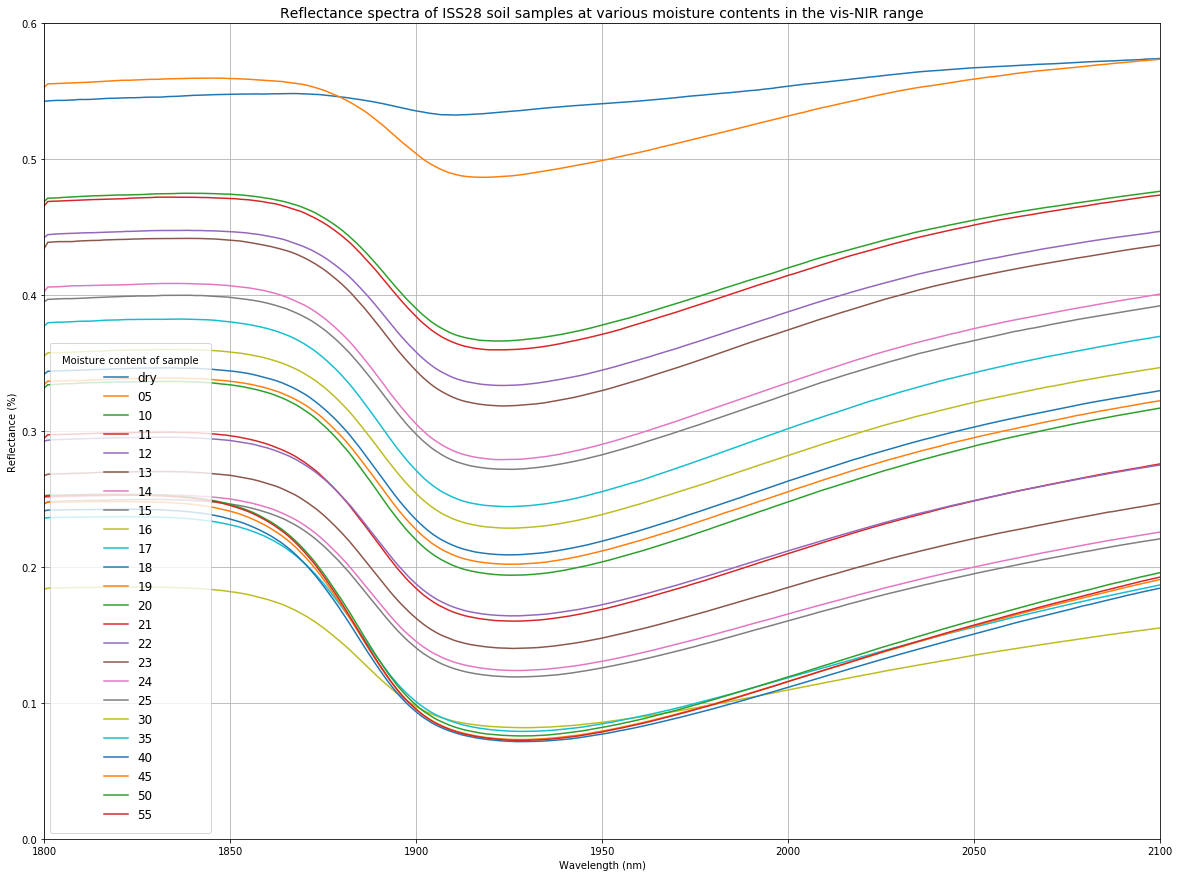

In [105]:
#limit df to focus on areas of interest
#Absorption feature ~1900nm
x = mean_pivot.index
labels=[sample, 'Mean reflectance of '+sample+' at various moisture contents in the vis-NIR range']

plt.figure(figsize=(20,15))
plt.xlim(1800,2100)
plt.ylim(0,0.6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range',fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', loc=3, borderpad=True,fontsize = 12)
#40 - 45% SM stand out in this plot with the sharpest dive
#centre of absorption feature appears around 

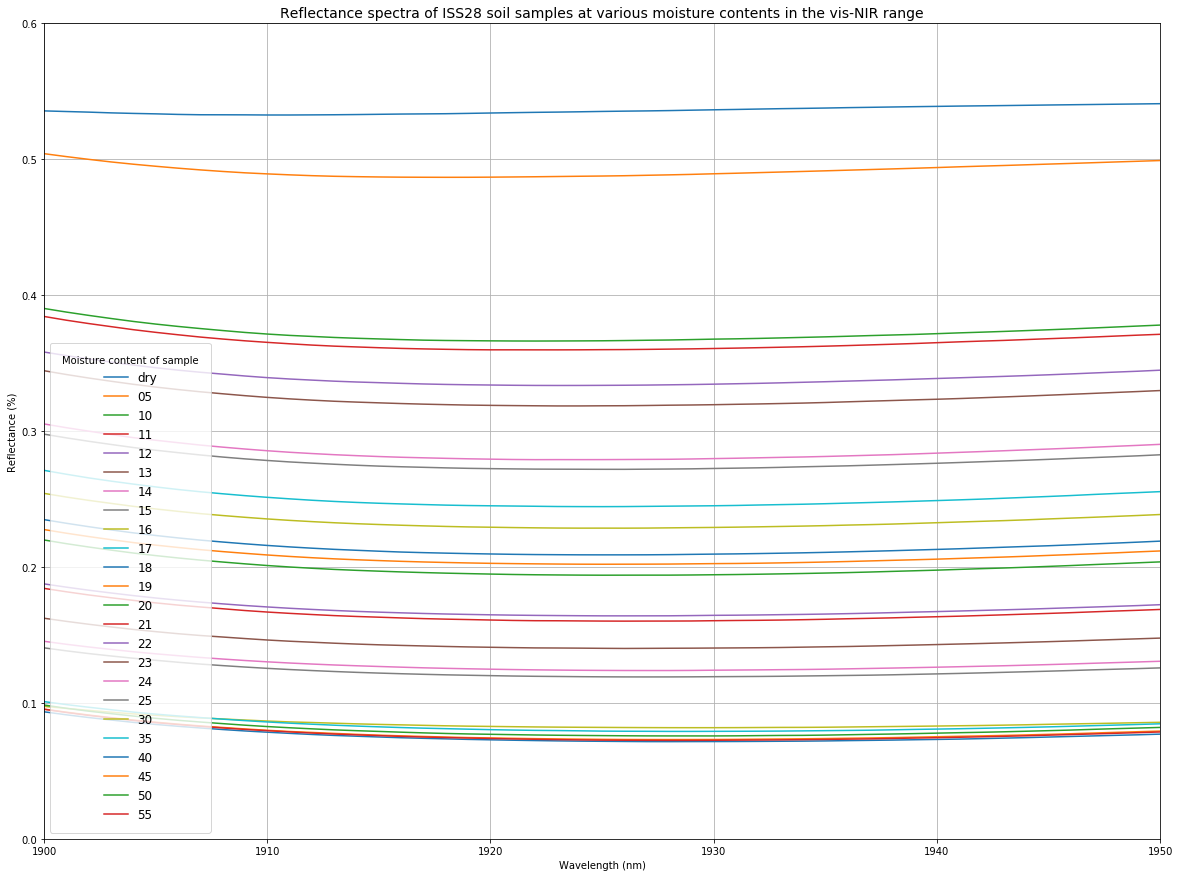

In [107]:
#limit df to focus on areas of interest
#Absorption feature ~1900nm
x = mean_pivot.index
labels=[sample, 'Mean reflectance of '+sample+' at various moisture contents in the vis-NIR range']

plt.figure(figsize=(20,15))
plt.xlim(1900,1950)
plt.ylim(0,0.6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range',fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', loc=3, borderpad=True,fontsize = 12)
#centre of absorption feature appears around 1920nm
#steeper drop into feature than out
#does the slope of the curve in correspond to moisture content
#or difference btw slope in and slope out, correspond to moisture content?

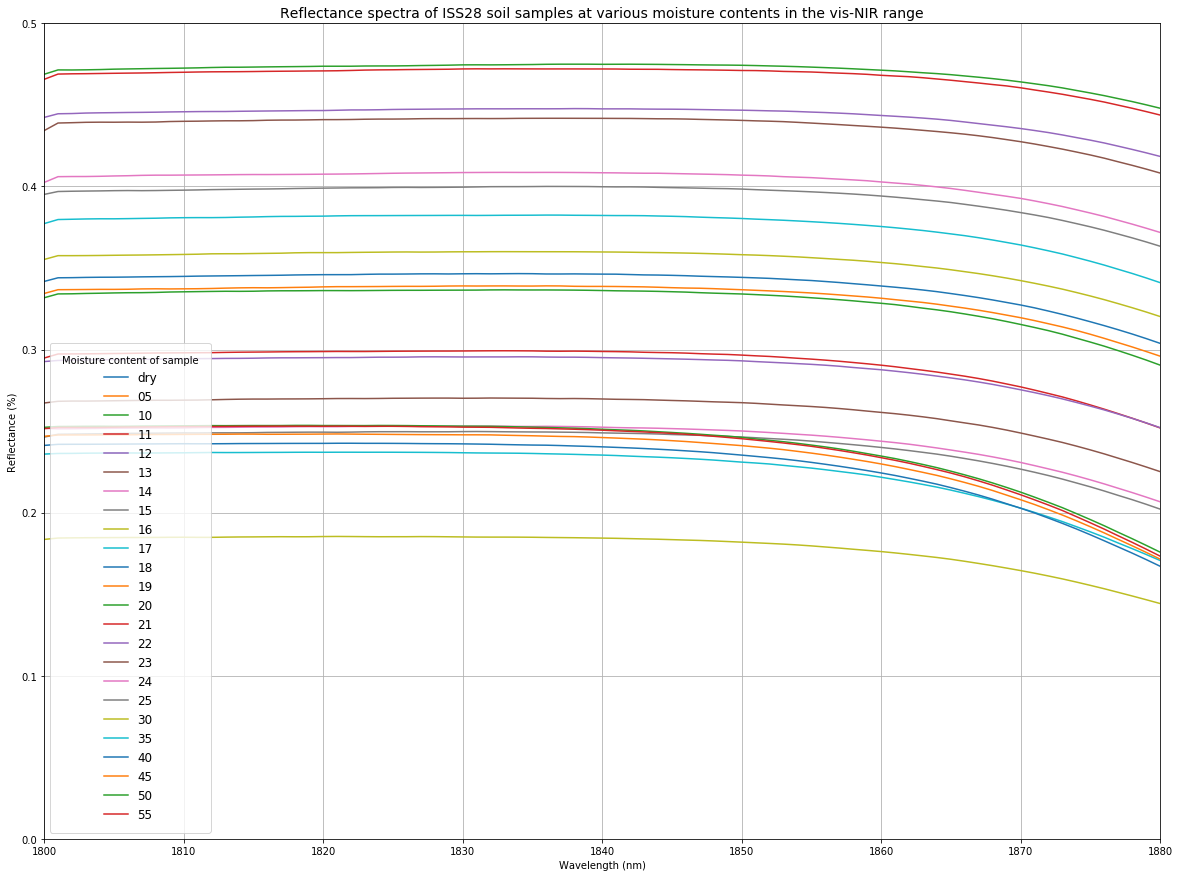

In [109]:
#where is the max value before the 1926nm absorption feature?
#limit df to focus on areas of interest
x = mean_pivot.index
labels=[sample, 'Mean reflectance of '+sample+' at various moisture contents in the vis-NIR range']

plt.figure(figsize=(20,15))
plt.xlim(1800,1880)
plt.ylim(0,0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range',fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', loc=3, borderpad=True,fontsize = 12)
#looks to be  ~1826nm

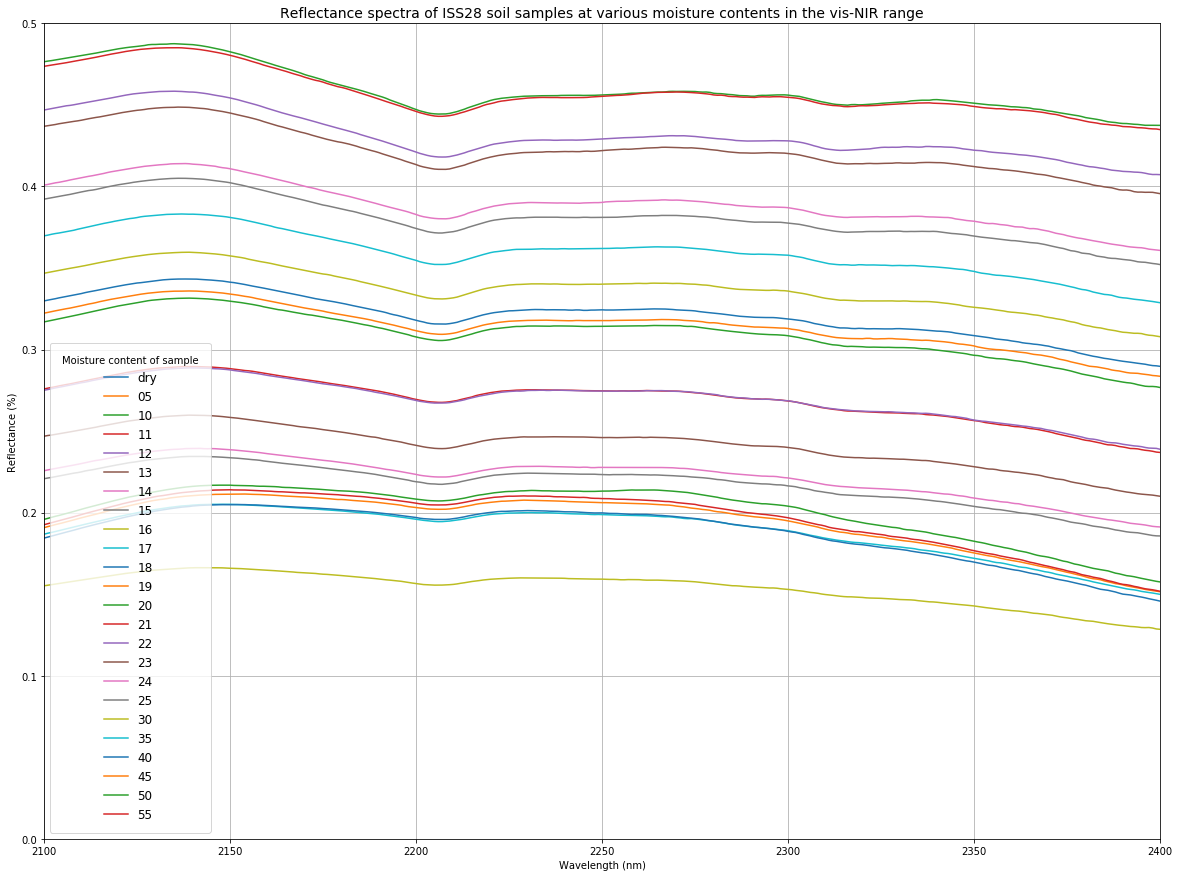

In [110]:
#limit df to focus on areas of interest
#Feature ~2200nm
x = mean_pivot.index
labels=[sample, 'Mean reflectance of '+sample+' at various moisture contents in the vis-NIR range']

plt.figure(figsize=(20,15))
plt.xlim(2100,2400)
plt.ylim(0,0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range',fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', loc=3, borderpad=True,fontsize = 12)
#Interesting, the spectra of 45%MC is smoother than those with less moisture
#perhaps the moisture absorbance masks the effects of other variables

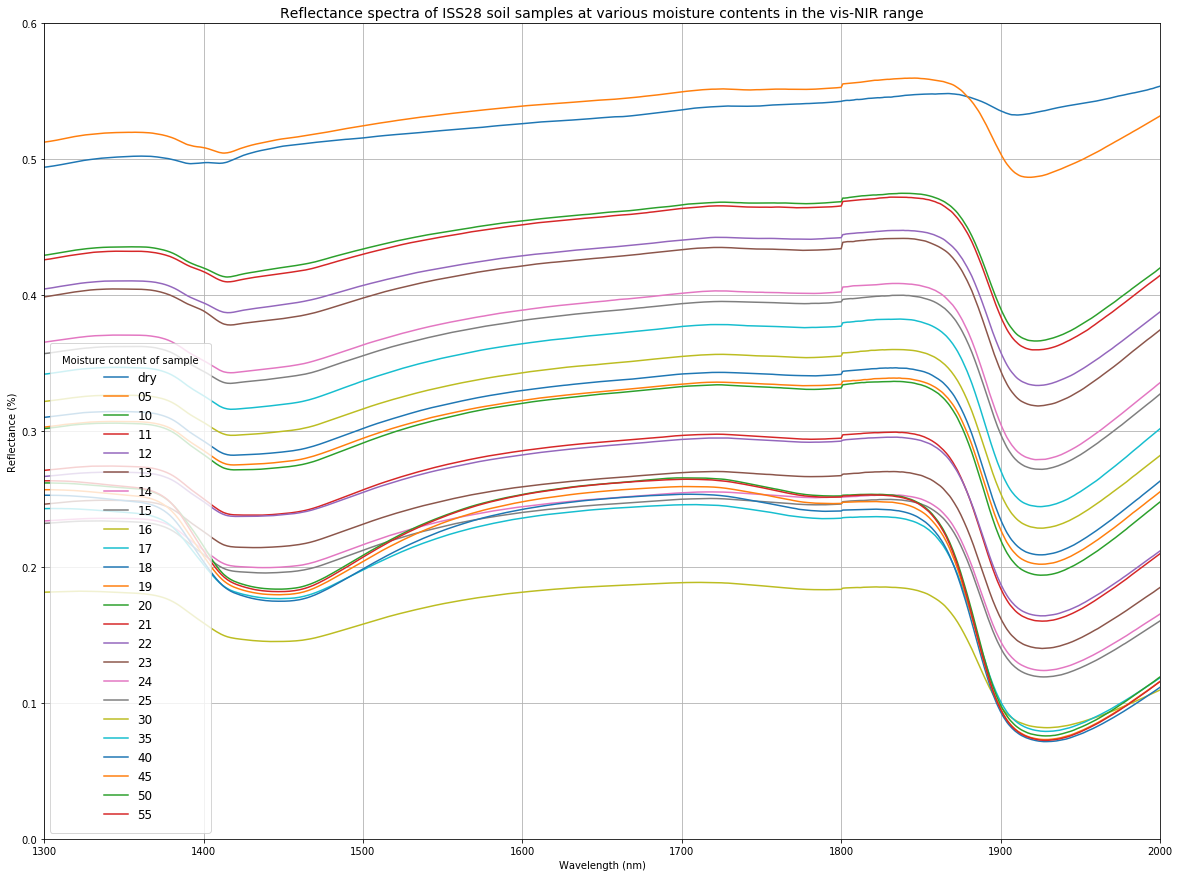

In [112]:
#limit df to focus on areas of interest
#overlapping spectra between 1400-1800nm
x = mean_pivot.index
labels=[sample, 'Mean reflectance of '+sample+' at various moisture contents in the vis-NIR range']

plt.figure(figsize=(20,15))
plt.xlim(1300,2000)
plt.ylim(0,0.6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range',fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', loc=3, borderpad=True,fontsize = 12)
#40 - 45% SM stand out in this plot with the sharpest dive
#centre of absorption feature appears around 

In [113]:
#calculate slope of line, on the lower slide of the large absorption feature ~1926nm
#row selection 1826nm-350nm = 1476
#row selection 1926nm-350nm = 1576
slope1a =  mean_pivot.iloc[1476]
slope1b =  mean_pivot.iloc[1576]
slope1c = slope1a-slope1b

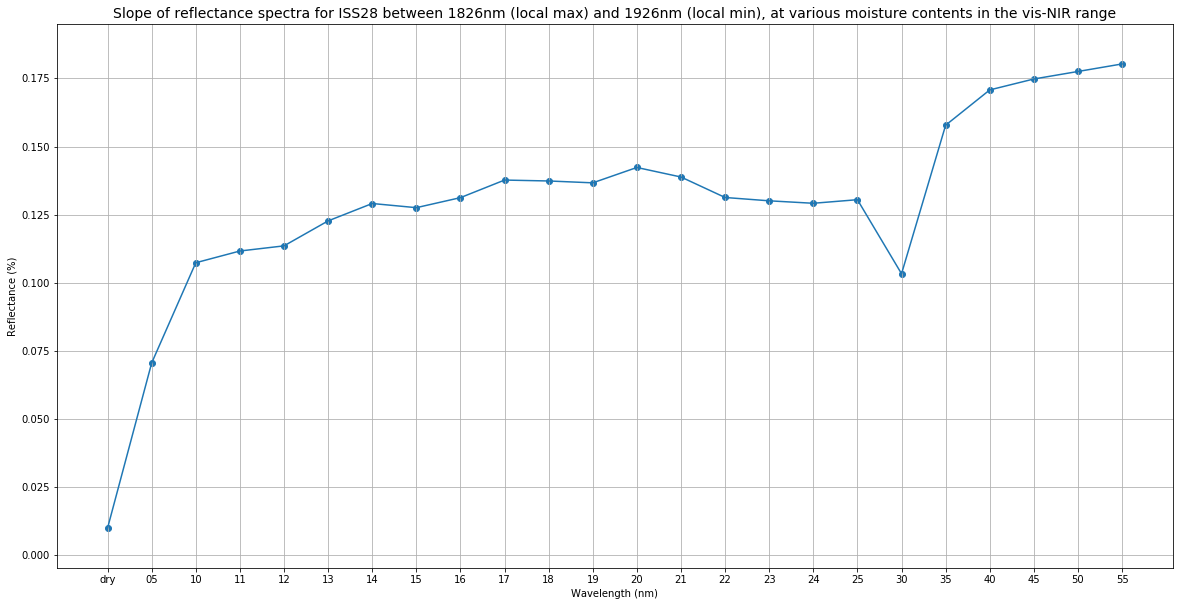

In [114]:
#calculate slope of line, on the lower slide of the large absorption feature ~1926nm
#row selection 1826nm-350nm = 1476
#row selection 1926nm-350nm = 1576
slope1a =  mean_pivot.iloc[1476]
slope1b =  mean_pivot.iloc[1576]
slope1c = slope1a-slope1b

x = mean_pivot.columns
y1 = slope1c


plt.figure(figsize=(20,10))
#plt.xlim(350,2500)
#plt.ylim(0,0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Slope of reflectance spectra for '+sample+' between 1826nm (local max) and 1926nm (local min), at various moisture contents in the vis-NIR range',fontsize=14)
#y2 = slope1b
plt.scatter(x,y1)
plt.plot(x,y1)
#plt.legend(y,fancybox = 1,title='Moisture content of sample', borderpad=True,fontsize = 12)